In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Encoding problem

In [2]:
# df = pd.read_csv('spotify-2023.csv' ,encoding='utf-8')

In [3]:
#!pip install chardet

### Method 1 identify the correct encoding

In [4]:
import chardet

with open('spotify-2023.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result['encoding'])


ISO-8859-1


In [5]:
df = pd.read_csv('spotify-2023.csv' ,encoding='ISO-8859-1')

In [6]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Method 2 ignore the encoding errors

In [7]:
df2 = pd.read_csv('spotify-2023.csv', encoding='utf-8', encoding_errors='ignore')

In [8]:
df2.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [10]:
df[df['in_shazam_charts'].isna()][['track_name','artist(s)_name','artist_count','released_year', 'in_shazam_charts']].sample(4)

,track_name,artist(s)_name,artist_count,released_year,in_shazam_charts
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,NaN
442,Last Christmas,Wham!,1,1984,NaN
520,love nwantiti (ah ah ah),Ckay,1,2019,NaN
429,Bad Habits,Ed Sheeran,1,2020,NaN


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [13]:
df.sample()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
291,Gato de Noche,"Nengo Flow, Bad Bunny",2,2022,12,22,2651,30,304118600,21,...,94,G#,Major,89,61,66,17,0,36,16


In [14]:
df.describe().columns.shape

(17,)

In [15]:
numerical_columns= df.describe().columns

In [16]:
numerical_columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')

In [17]:
total_columns = df.columns

In [18]:
total_columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### non numerical columns

In [19]:
non_numeric_col = []
for col in total_columns:
    if col not in numerical_columns.values:
        non_numeric_col.append(col)
        print(col,"--->dtype----------->", type(col))

track_name --->dtype-----------> <class 'str'>
artist(s)_name --->dtype-----------> <class 'str'>
streams --->dtype-----------> <class 'str'>
in_deezer_playlists --->dtype-----------> <class 'str'>
in_shazam_charts --->dtype-----------> <class 'str'>
key --->dtype-----------> <class 'str'>
mode --->dtype-----------> <class 'str'>


In [20]:
df['streams'].sample(3)

426    199386237
61     156338624
150     31873544
Name: streams, dtype: object

In [21]:
df['in_deezer_playlists'].sample(3)

176    1,378
160       10
154      356
Name: in_deezer_playlists, dtype: object

In [22]:
df['in_shazam_charts'].sample(3)

256    49
828     1
289     0
Name: in_shazam_charts, dtype: object

In [23]:
df['key'].value_counts()

key
C#    115
G      91
F      87
G#     85
D      78
B      77
A      71
F#     69
E      59
A#     55
D#     30
Name: count, dtype: int64

In [24]:
df['mode'].value_counts()

mode
Major    452
Minor    365
Name: count, dtype: int64

In [25]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift           29
SZA                    17
Bad Bunny              16
The Weeknd             15
Kendrick Lamar         12
                       ..
Kanii, PR1ISVX          1
Yng Lvcas               1
NF                      1
Tiï¿½ï¿½sto, Tate M     1
Feid, Sech, Jhayco      1
Name: count, Length: 571, dtype: int64

In [26]:
non_numeric_col

['track_name',
 'artist(s)_name',
 'streams',
 'in_deezer_playlists',
 'in_shazam_charts',
 'key',
 'mode']

In [27]:
for x in non_numeric_col:
    if x in ['track_name', 'artist(s)_name', 'key', 'mode']:
        pass
    else:
     df[x] = pd.to_numeric(df[x], errors='coerce')


In [28]:
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_deezer_playlists']

0       45.0
1       58.0
2       91.0
3      125.0
4       87.0
       ...  
948     37.0
949      8.0
950      7.0
951     17.0
952     32.0
Name: in_deezer_playlists, Length: 817, dtype: float64

### shortcut code

In [29]:
non_numeric_col = df.select_dtypes(include=['object']).columns
print(non_numeric_col)

for x in non_numeric_col:
    if x in ['track_name', 'artist(s)_name', 'key', 'mode']:
        pass
    else:
        df[x] = pd.to_numeric(df[x], errors='coerce')


Index(['track_name', 'artist(s)_name', 'key', 'mode'], dtype='object')


In [30]:
df.describe().columns.shape

(20,)

In [31]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,8.160000e+02,817.000000,817.000000,752.000000,817.000000,813.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,4.689858e+08,60.161567,49.473684,93.492021,2.451652,51.691267,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,5.231267e+08,74.923594,49.570455,155.561951,5.397024,128.746914,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,2.638368e+08,32.000000,34.000000,32.000000,0.000000,2.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,6.011986e+08,78.000000,84.000000,99.000000,2.000000,37.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [32]:
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
680,Bussin,"Nicki Minaj, Lil Baby",2,2022,2,11,847,0,6.471457e+07,25,...,140,B,Major,89,75,70,6,0,13,5
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,9.627375e+07,10,...,130,E,Minor,82,69,83,3,0,27,5
898,Pipoco,"Melody, Ana Castela, Dj Chris No Beat",3,2022,5,20,1112,4,1.918734e+08,22,...,135,G#,Major,77,74,74,47,0,34,8
110,Money Trees,"Kendrick Lamar, Jay Rock",2,2012,1,1,26792,32,1.093606e+09,69,...,144,E,Minor,74,37,53,7,0,21,10
611,Ley Seca,"Anuel Aa, Jhay Cortez",2,2021,9,2,2012,0,3.552192e+08,101,...,105,G#,Major,76,58,84,10,0,13,10


In [33]:
df['streams'].max()

3562543890.0

In [34]:
df['streams']= (df['streams']/df['streams'].max())*100

In [35]:
df['streams'].max()

100.0

In [36]:
df['streams'].describe()

count    816.000000
mean      13.164351
std       14.684079
min        0.000078
25%        3.769352
50%        7.405853
75%       16.875542
max      100.000000
Name: streams, dtype: float64

In [37]:
df.sample(15)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
305,HAPPY,NF,1,2023,3,25,660,0,1.479926,22,...,106,G,Major,73,22,86,31,0,12,4
254,Mejor Que Yo,"Mambo Kingz, DJ Luian, Anuel Aa",3,2023,5,4,675,1,1.427284,9,...,178,C#,Minor,62,56,66,18,0,12,5
572,Knife Talk (with 21 Savage ft. Project Pat),"Drake, Project Pat, 21 Savage",3,2021,9,3,5199,0,16.687036,45,...,146,F,Minor,85,22,37,13,0,7,30
11,Super Shy,NewJeans,1,2023,7,7,422,55,1.635212,37,...,150,F,Minor,78,52,82,18,0,15,7
536,Malvadï¿½ï¿,"Xamï¿½ï¿½, Gustah, Neo B",3,2021,11,30,648,1,6.755971,14,...,133,F#,Minor,82,52,61,38,0,14,27
153,Nosso Quadro,"Ana Castela, AgroPlay",2,2023,2,2,894,9,6.562772,14,...,160,A,Major,69,61,71,33,0,31,20
365,Enemy (with JID) - from the series Arcane Leag...,"Imagine Dragons, League of Legends, JID, Arcane",4,2021,9,3,6180,7,34.342907,122,...,77,B,Minor,72,59,76,24,0,42,28
485,Conceited,SZA,1,2022,12,9,899,0,1.596351,2,...,150,C#,Major,79,77,46,5,0,11,7
166,Every Breath You Take - Remastered 2003,The Police,1,1983,1,6,22439,19,44.722838,211,...,117,C#,Major,82,73,45,54,0,7,3
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,13.283999,126,...,143,D,Major,60,86,32,88,0,34,6


In [38]:
all_artists = df['artist(s)_name'].str.split(',').explode().str.strip()
unique_artists = all_artists.unique()
unique_artists

array(['Latto', 'Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave', 'Central Cee',
       'Eslabon Armado', 'Peso Pluma', 'Quevedo', 'Gunna', 'Yng Lvcas',
       'Grupo Frontera', 'NewJeans', 'David Kushner', 'SZA',
       'Fifty Fifty', 'Feid', 'Young Miko', 'Jimin', 'Gabito Ballesteros',
       'Junior H', 'Bizarrap', 'The Weeknd', 'Madonna', 'Playboi Carti',
       'Fuerza Regida', 'Rï¿½ï¿½ma', 'Selena G', 'Tainy', 'Morgan Wallen',
       'Dua Lipa', 'Troye Sivan', '21 Savage', 'Metro Boomin', 'Karol G',
       'Shakira', 'Yahritza Y Su Esencia', 'Post Malone', 'Swae Lee',
       'Bebe Rexha', 'David Guetta', 'Tyler', 'The Creator', 'Kali Uchis',
       'Miley Cyrus', 'Daft Punk', 'Ariana Grande', 'Sky Rompiendo',
       'Anne-Marie', 'Coi Leray', 'Peggy Gou', 'Manuel Turizo', 'dennis',
       'MC Kevin o Chris', 'PinkPantheress', 'Ice Spice', 'Charlie Puth',
       'BTS', 'Rauw Alejandro', 'ROSALï¿½', 'Ozuna', 'Chris Molitor',
       'Libianca'

In [39]:
artist_counts = all_artists.value_counts()
result_df = artist_counts.reset_index()
result_df.columns = ['artist', 'artist_counts']

# Add the 'popularity' column based on conditions
result_df['popularity'] = result_df['artist_counts'].apply(
    lambda x: 'top artist' if x > 15 else 'popular' if 5 <= x <= 15 else 'new'
)
result_df

,artist,artist_counts,popularity
0,Bad Bunny,36,top artist
1,Taylor Swift,32,top artist
2,The Weeknd,27,top artist
3,Kendrick Lamar,23,top artist
4,Feid,21,top artist
...,...,...,...
623,P!nk,1,new
624,King,1,new
625,Wisin & Yandel,1,new
626,Fujii Kaze,1,new


In [40]:
# Map popularity categories to scores
popularity_scores = {'top artist': 10, 'popular': 5, 'new': 1}

# Add the popularity score to the result DataFrame
result_df['popularity_score'] = result_df['popularity'].map(popularity_scores)

# Function to calculate artist popularity score for each row in the original DataFrame
def calculate_artist_popularity(artist_list):
    artists = [artist.strip() for artist in artist_list.split(',')]  # Split and clean artist names
    score = sum(result_df[result_df['artist'].isin(artists)]['popularity_score'])  # Sum scores for artists in the list
    return score

# Apply the function to calculate artist popularity scores
df['artist_popularity_score'] = df['artist(s)_name'].apply(calculate_artist_popularity)

# Display the modified DataFrame
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,3.968560,43,...,B,Major,80,89,83,31,0,8,4,2
1,LALA,Myke Towers,1,2023,3,23,1474,48,3.753393,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,3.929888,94,...,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,22.479465,116,...,A,Major,55,58,72,11,0,11,15,10
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,8.511792,84,...,A,Minor,65,23,80,14,63,11,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,2.567642,61,...,A,Major,60,24,39,57,0,8,3,1
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,3.420923,4,...,F#,Major,42,7,24,83,1,12,6,10
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,2.063517,2,...,C#,Major,80,81,67,4,0,8,6,11
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,3.758427,29,...,C#,Major,82,67,77,8,0,12,5,12


In [41]:
result_df[result_df['artist']=='Jung Kook']

,artist,artist_counts,popularity,popularity_score
62,Jung Kook,4,new,1


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
# vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))

# # Fit and transform the data
# artist_vectors = vectorizer.fit_transform(df['artist(s)_name'])

# # Convert the result into a DataFrame for better readability
# artist_vector_df = pd.DataFrame(artist_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# # Display the DataFrame
# artist_vector_df

In [44]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'artist_popularity_score'],
      dtype='object')

In [45]:
import seaborn as sns

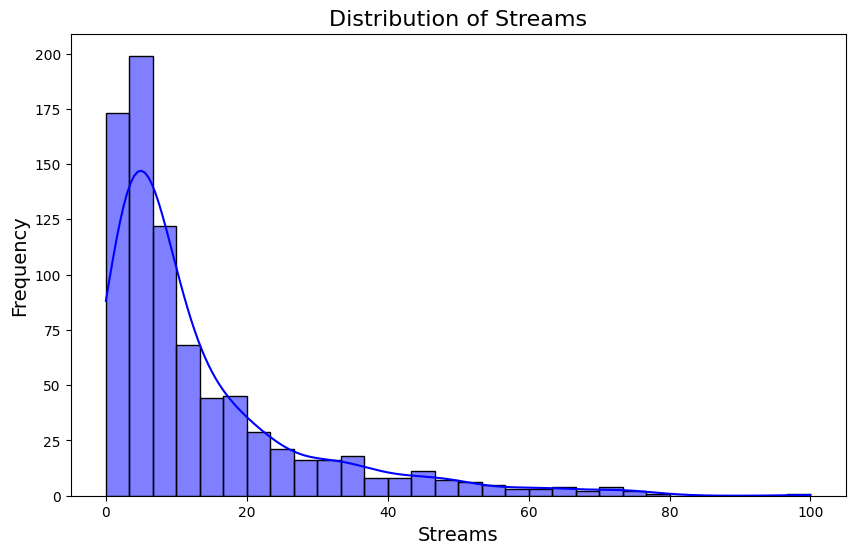

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['streams'], kde=True, bins=30, color='blue')
plt.title("Distribution of Streams", fontsize=16)
plt.xlabel("Streams", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [47]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'artist_popularity_score'],
      dtype='object')

In [48]:
df2 = df.drop(columns=['track_name', 'artist(s)_name','artist_count', 'released_year',
       'released_month', 'released_day', 'key', 'mode'])

In [49]:
df2.sample(3)

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
621,14749,0,64.243282,188,34,710.0,0,5.0,84,44,22,48,38,0,33,24,1
142,293,8,0.335621,5,2,30.0,2,66.0,133,93,68,65,42,0,12,25,2
24,1945,87,3.238264,74,182,87.0,14,NaN,99,85,83,68,7,0,36,20,12


In [50]:
df2.columns

Index(['in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'artist_popularity_score'],
      dtype='object')

In [51]:
df2.isnull().sum()

in_spotify_playlists        0
in_spotify_charts           0
streams                     1
in_apple_playlists          0
in_apple_charts             0
in_deezer_playlists        65
in_deezer_charts            0
in_shazam_charts            4
bpm                         0
danceability_%              0
valence_%                   0
energy_%                    0
acousticness_%              0
instrumentalness_%          0
liveness_%                  0
speechiness_%               0
artist_popularity_score     0
dtype: int64

In [52]:
df2.dropna(inplace=True)

In [53]:
df2.isnull().sum()

in_spotify_playlists       0
in_spotify_charts          0
streams                    0
in_apple_playlists         0
in_apple_charts            0
in_deezer_playlists        0
in_deezer_charts           0
in_shazam_charts           0
bpm                        0
danceability_%             0
valence_%                  0
energy_%                   0
acousticness_%             0
instrumentalness_%         0
liveness_%                 0
speechiness_%              0
artist_popularity_score    0
dtype: int64

In [54]:
df2.shape

(748, 17)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, df2['streams'], test_size = 0.2 ,random_state = 2)

In [56]:
X_train

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
597,4846,10,11.864866,54,16,259.0,0,13.0,101,67,40,90,3,0,34,6,3
303,4942,26,9.139324,190,104,147.0,18,63.0,120,70,70,79,7,0,18,10,2
327,34,0,1.914839,0,0,0.0,0,0.0,92,71,41,31,79,0,10,5,1
20,332,26,2.426492,11,163,10.0,4,0.0,140,65,87,74,22,0,42,4,11
645,580,0,7.250887,24,92,93.0,0,0.0,122,80,62,69,28,0,13,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,200,2,5.689122,12,4,0.0,0,0.0,72,64,76,44,70,9,12,4,1
768,2575,0,4.404109,4,5,12.0,0,51.0,87,52,32,83,24,0,17,43,10
648,6809,28,20.114601,151,102,175.0,5,29.0,94,84,90,70,9,0,14,8,6
695,13454,1,40.397856,246,71,519.0,2,5.0,99,68,57,77,2,0,10,5,5


### Ready for binning

In [57]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [58]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
np.mean(cross_val_score(lr,X_train,y_train,scoring='r2'))

1.0

In [59]:
r2_score(y_test,y_pred)

1.0

In [60]:
y_pred[0:5]

array([16.86931773,  4.40861572,  5.96068137,  4.87578933,  3.33498356])

In [61]:
y_test[0:5]

81     16.869318
90      4.408616
789     5.960681
771     4.875789
257     3.334984
Name: streams, dtype: float64

In [62]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [63]:
count = 0
for col in df2.columns:
    count+=1
count   

17

In [64]:
df2

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
0,553,147,3.968560,43,263,45.0,10,826.0,125,80,89,83,31,0,8,4,2
1,1474,48,3.753393,48,126,58.0,14,382.0,92,71,61,74,7,0,10,4,1
2,1397,113,3.929888,94,207,91.0,14,949.0,138,51,32,53,17,0,31,6,5
3,7858,100,22.479465,116,207,125.0,12,548.0,170,55,58,72,11,0,11,15,10
4,3133,50,8.511792,84,133,87.0,15,425.0,144,65,23,80,14,63,11,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,953,0,2.567642,61,13,37.0,1,0.0,144,60,24,39,57,0,8,3,1
949,1180,0,3.420923,4,0,8.0,0,0.0,166,42,7,24,83,1,12,6,10
950,573,0,2.063517,2,0,7.0,0,0.0,92,80,81,67,4,0,8,6,11
951,1320,0,3.758427,29,26,17.0,0,0.0,97,82,67,77,8,0,12,5,12


In [65]:
transformer1 = ColumnTransformer(transformers=[
    ('binning',KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile'),slice(0,16))
],remainder='passthrough')

In [66]:
X_train_trf = transformer1.fit_transform(X_train)
X_test_trf = transformer1.transform(X_test)

C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.wa

In [67]:
X_train.shape

(598, 17)

In [68]:
X_train_trf

array([[8., 2., 7., ..., 9., 4., 3.],
       [8., 4., 6., ..., 6., 6., 2.],
       [0., 0., 1., ..., 3., 3., 1.],
       ...,
       [8., 4., 8., ..., 5., 5., 6.],
       [9., 0., 9., ..., 3., 3., 5.],
       [9., 2., 8., ..., 0., 6., 1.]])

In [69]:
# transformer1.bin_edges_

In [70]:
transformer1.named_transformers_

{'binning': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

### just checking bin edges (meaning the boundaries of my bins) in all columns

In [71]:
transformer1.named_transformers_['binning'].bin_edges_

array([array([   31. ,   351.1,   649.2,   888.4,  1189.8,  1722. ,  2337.2,
               3106.1,  4548.8,  6867.6, 29499. ])                          ,
       array([  0. ,   2. ,   6. ,  11. ,  20.6,  36. , 147. ]),
       array([7.75288694e-05, 1.81796868e+00, 2.78984472e+00, 4.05797429e+00,
              5.19965201e+00, 6.70534416e+00, 8.51134215e+00, 1.13365254e+01,
              1.58800568e+01, 2.25314650e+01, 7.88227917e+01])               ,
       array([  0. ,   4. ,   8. ,  14. ,  20. ,  27. ,  38. ,  52. ,  78.6,
              120. , 492. ])                                                ,
       array([  0. ,   3. ,   9. ,  16. ,  25. ,  46. ,  69. ,  86.6, 110. ,
              275. ])                                                       ,
       array([  0. ,   4. ,   8.4,  13. ,  21. ,  31. ,  49. ,  70.9, 113.6,
              245.3, 964. ])                                                ,
       array([ 0.,  1.,  3., 10., 45.]),
       array([  0. ,   1. ,   2. ,   7.

In [72]:
transformer1.named_transformers_['binning'].n_bins_

array([10,  6, 10, 10,  9, 10,  4,  7, 10, 10, 10, 10, 10,  2, 10,  9])

In [73]:
transformed_df = pd.DataFrame(X_train_trf, columns=df2.columns)

In [74]:
transformed_df

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
0,8.0,2.0,7.0,7.0,3.0,9.0,0.0,3.0,2.0,4.0,3.0,9.0,1.0,0.0,9.0,4.0,3.0
1,8.0,4.0,6.0,9.0,7.0,8.0,3.0,5.0,4.0,5.0,7.0,8.0,2.0,0.0,6.0,6.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0,9.0,0.0,3.0,3.0,1.0
3,0.0,4.0,1.0,2.0,8.0,2.0,2.0,0.0,7.0,4.0,9.0,7.0,5.0,0.0,9.0,2.0,11.0
4,1.0,0.0,5.0,4.0,7.0,7.0,0.0,0.0,5.0,8.0,6.0,6.0,6.0,0.0,5.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,8.0,1.0,9.0,1.0,5.0,2.0,1.0
594,6.0,0.0,3.0,1.0,1.0,2.0,0.0,4.0,0.0,1.0,2.0,8.0,5.0,0.0,6.0,8.0,10.0
595,8.0,4.0,8.0,9.0,7.0,8.0,2.0,4.0,1.0,9.0,9.0,6.0,3.0,0.0,5.0,5.0,6.0
596,9.0,0.0,9.0,9.0,6.0,9.0,1.0,2.0,2.0,4.0,5.0,7.0,1.0,0.0,3.0,3.0,5.0


In [75]:
transformer2 = LinearRegression()

In [76]:
from sklearn.pipeline import Pipeline,make_pipeline

In [77]:
pipe = make_pipeline(transformer1,transformer2)
 
pipe.fit(X_train_trf, y_train)
    
y_pred2 = pipe.predict(X_test_trf)

C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.wa

In [78]:
y_test[0:5]

81     16.869318
90      4.408616
789     5.960681
771     4.875789
257     3.334984
Name: streams, dtype: float64

In [79]:
y_pred2[0:5]

array([22.4117826 ,  6.83793062,  7.82365937,  7.08538327,  2.58669661])

In [80]:
np.mean(cross_val_score(transformer2,X_train_trf,y_train,scoring='r2'))

0.6917222241081935

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
mse = mean_squared_error(y_test, y_pred)
mse_before_binning = mean_squared_error(y_test, y_pred2)
print(f"Mean squared error " , {mse})
print(f"Mean squared error before binning" , {mse_before_binning})

Mean squared error  {1.375441521914175e-27}
Mean squared error before binning {33.68846803289097}


In [83]:
transformed_df

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
0,8.0,2.0,7.0,7.0,3.0,9.0,0.0,3.0,2.0,4.0,3.0,9.0,1.0,0.0,9.0,4.0,3.0
1,8.0,4.0,6.0,9.0,7.0,8.0,3.0,5.0,4.0,5.0,7.0,8.0,2.0,0.0,6.0,6.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0,9.0,0.0,3.0,3.0,1.0
3,0.0,4.0,1.0,2.0,8.0,2.0,2.0,0.0,7.0,4.0,9.0,7.0,5.0,0.0,9.0,2.0,11.0
4,1.0,0.0,5.0,4.0,7.0,7.0,0.0,0.0,5.0,8.0,6.0,6.0,6.0,0.0,5.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,8.0,1.0,9.0,1.0,5.0,2.0,1.0
594,6.0,0.0,3.0,1.0,1.0,2.0,0.0,4.0,0.0,1.0,2.0,8.0,5.0,0.0,6.0,8.0,10.0
595,8.0,4.0,8.0,9.0,7.0,8.0,2.0,4.0,1.0,9.0,9.0,6.0,3.0,0.0,5.0,5.0,6.0
596,9.0,0.0,9.0,9.0,6.0,9.0,1.0,2.0,2.0,4.0,5.0,7.0,1.0,0.0,3.0,3.0,5.0


In [84]:
from scipy.stats import skew

### Visualization using equal frequency binning

in_spotify_playlists -->has skewness--> 2.942955848987998
After binning in_spotify_playlists -->has skewness--> 0.0


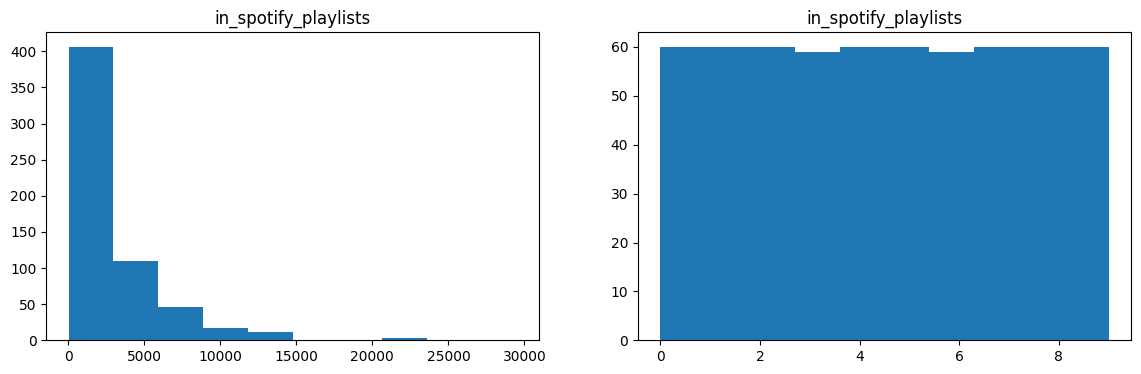

in_spotify_charts -->has skewness--> 2.6491268325801642
After binning in_spotify_charts -->has skewness--> 0.7358270254457214


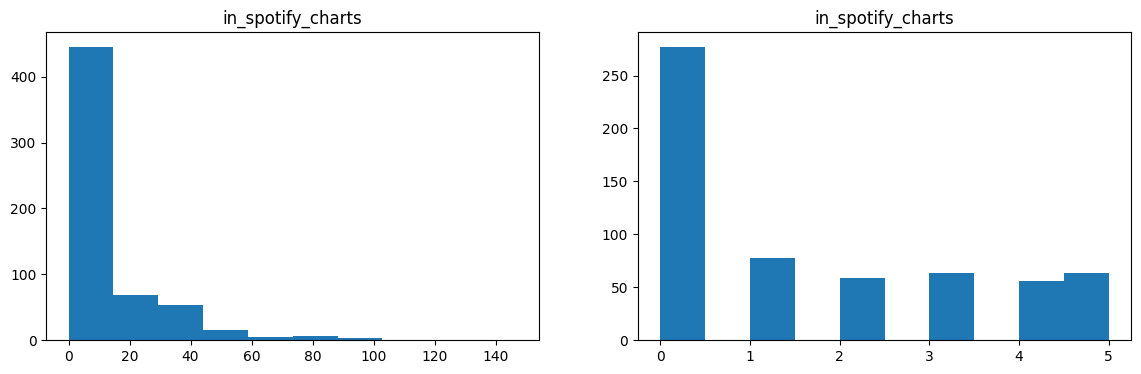

streams -->has skewness--> 2.366648567136922
After binning streams -->has skewness--> 0.0


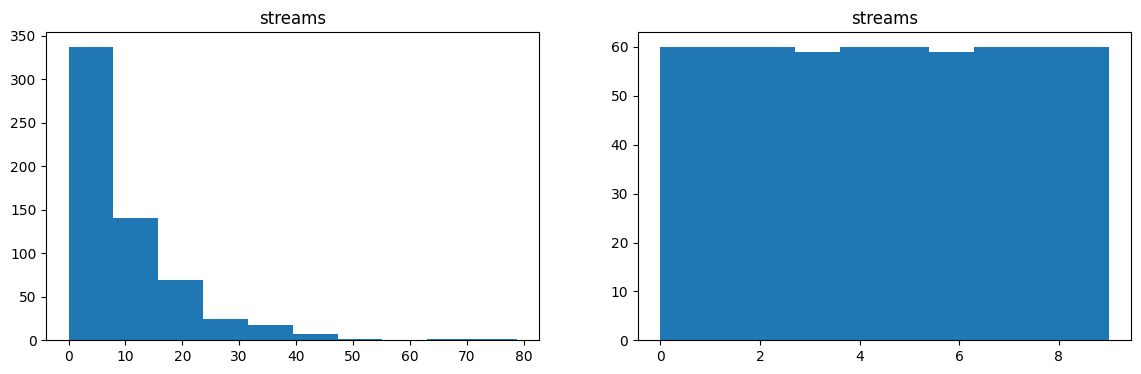

in_apple_playlists -->has skewness--> 2.478448722213829
After binning in_apple_playlists -->has skewness--> -0.0032672021860759453


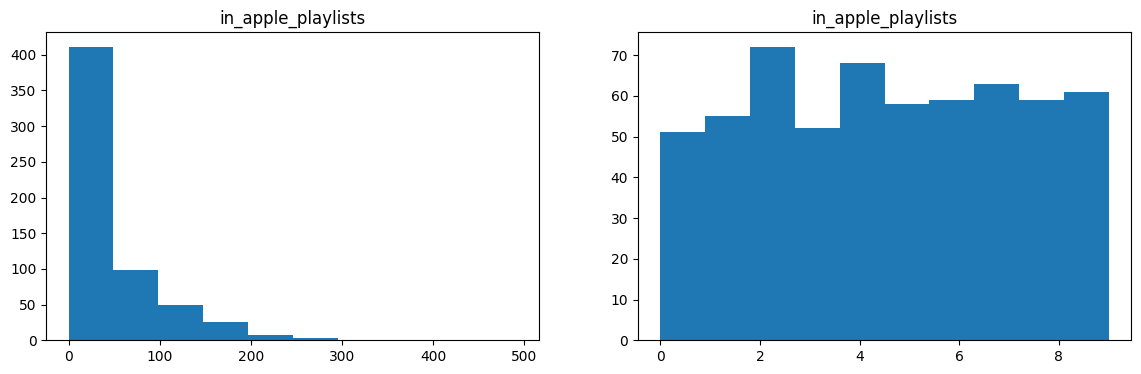

in_apple_charts -->has skewness--> 1.4006368667711946
After binning in_apple_charts -->has skewness--> 0.13223794757807356


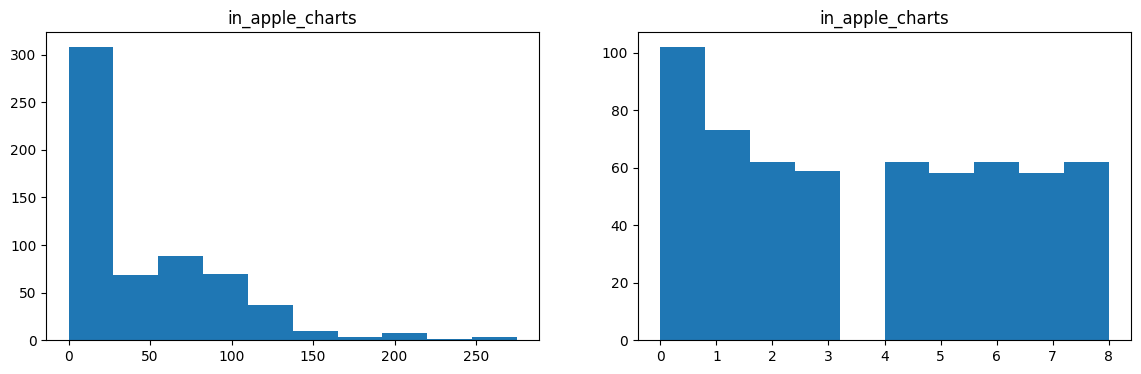

in_deezer_playlists -->has skewness--> 3.297766942141813
After binning in_deezer_playlists -->has skewness--> -0.011040224533768008


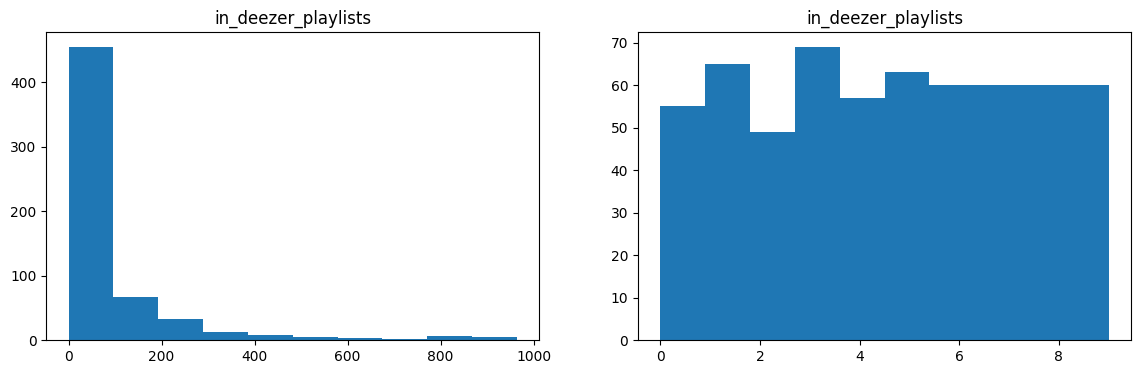

in_deezer_charts -->has skewness--> 3.241028065808733
After binning in_deezer_charts -->has skewness--> 1.1743171012110944


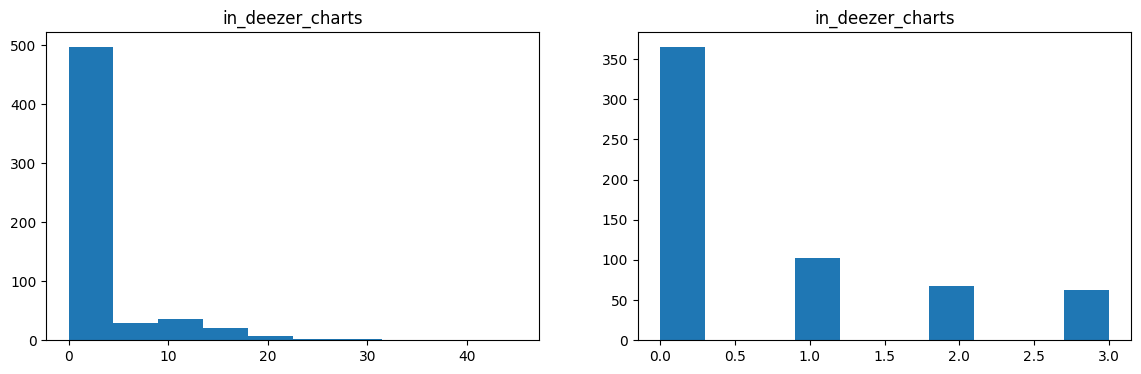

in_shazam_charts -->has skewness--> 4.184804572243403
After binning in_shazam_charts -->has skewness--> 0.49146019397257223


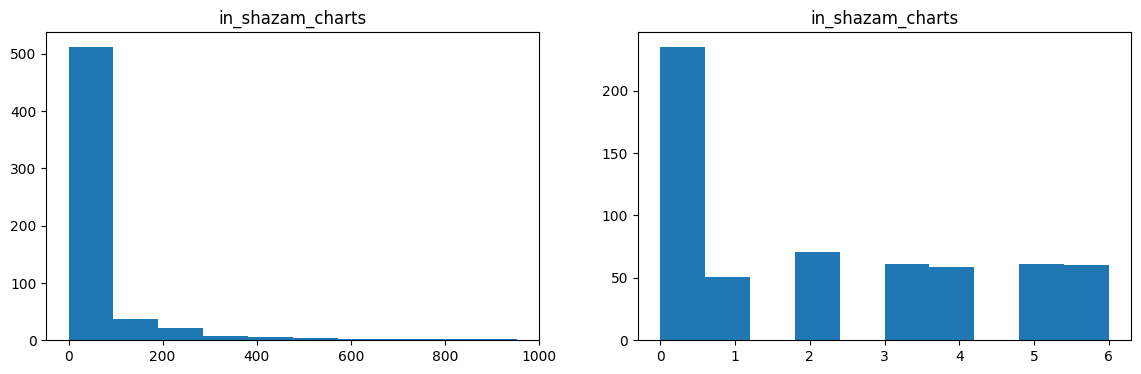

bpm -->has skewness--> 0.33311466440920523
After binning bpm -->has skewness--> -0.02162602861107462


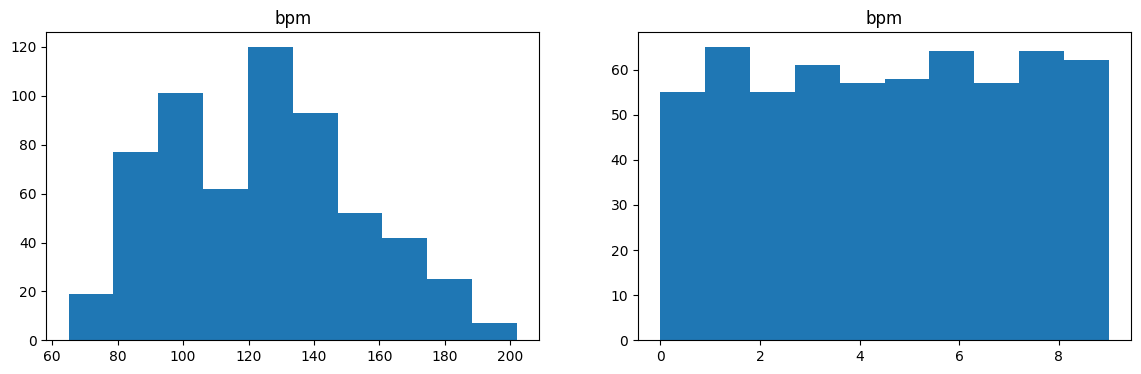

danceability_% -->has skewness--> -0.44871471111074007
After binning danceability_% -->has skewness--> -0.0009924303046223934


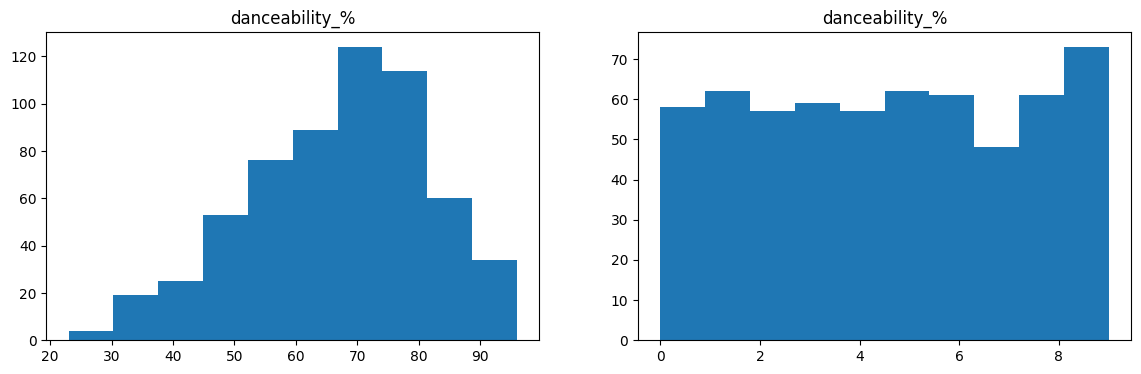

valence_% -->has skewness--> 0.028585075490389432
After binning valence_% -->has skewness--> -0.015169158873959778


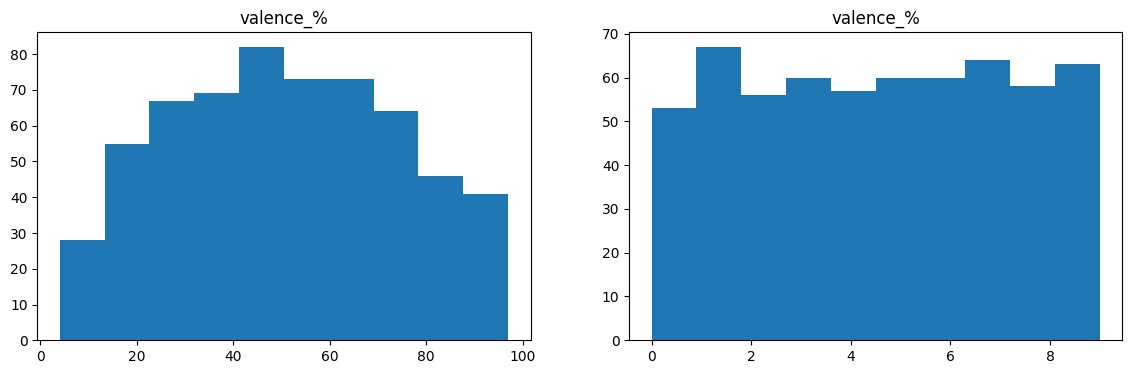

energy_% -->has skewness--> -0.3353848846501554
After binning energy_% -->has skewness--> -0.014418853377491565


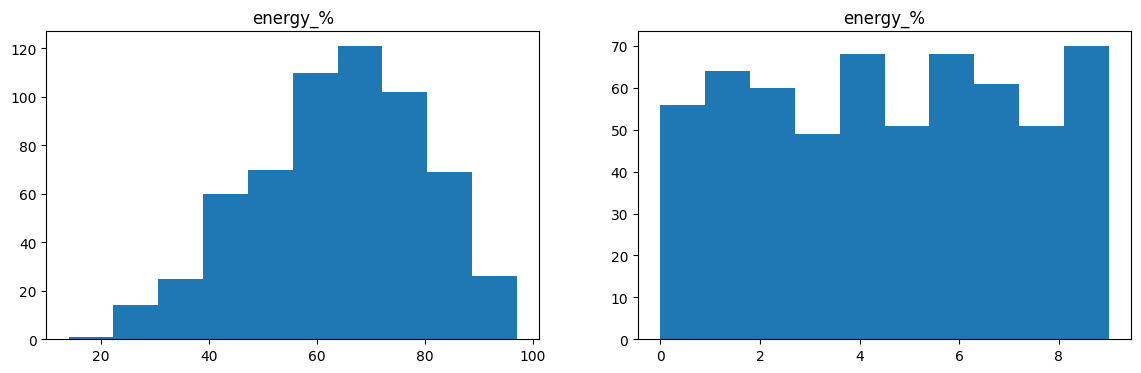

acousticness_% -->has skewness--> 0.9505708140072238
After binning acousticness_% -->has skewness--> 0.0296911560742573


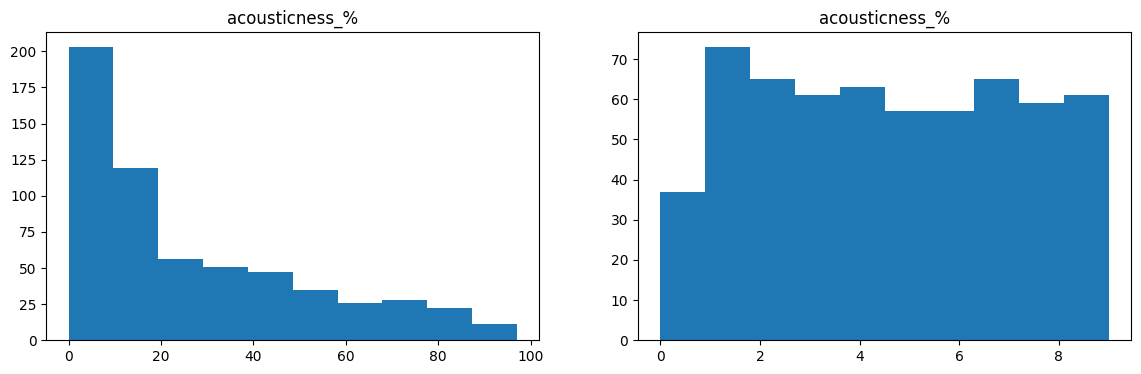

instrumentalness_% -->has skewness--> 6.28342459696652
After binning instrumentalness_% -->has skewness--> 2.6604869535924127


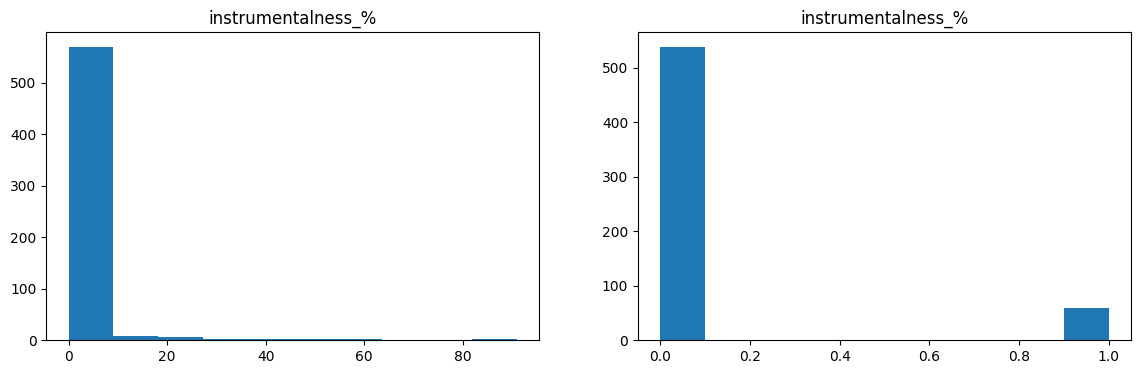

liveness_% -->has skewness--> 2.1921977277140106
After binning liveness_% -->has skewness--> -0.156591892184772


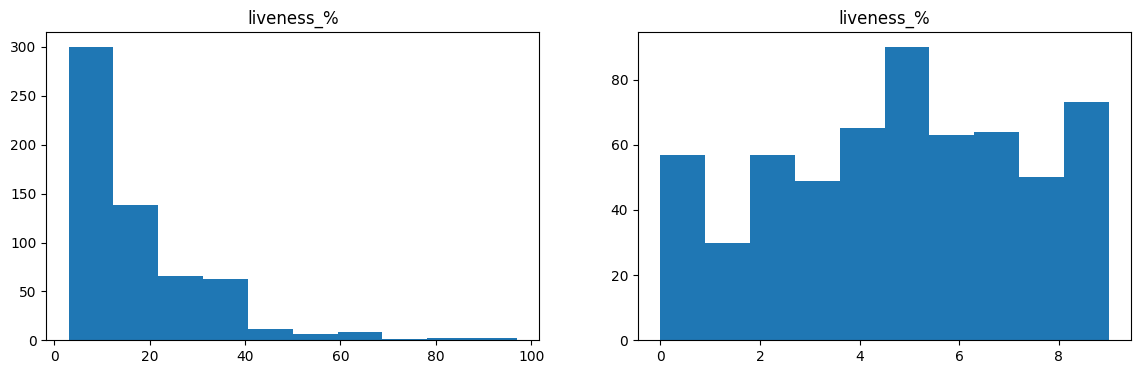

speechiness_% -->has skewness--> 1.7243828099204268
After binning speechiness_% -->has skewness--> 0.25843530775286916


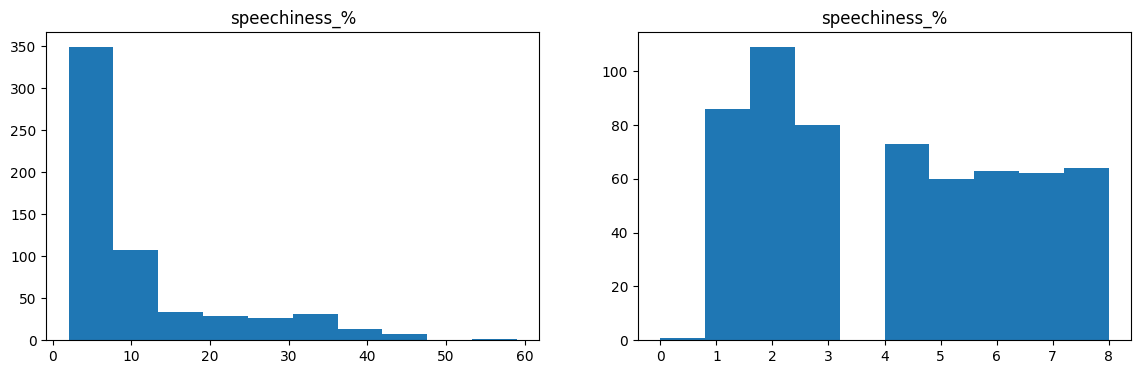

artist_popularity_score -->has skewness--> 0.82056643951907
After binning artist_popularity_score -->has skewness--> 0.82056643951907


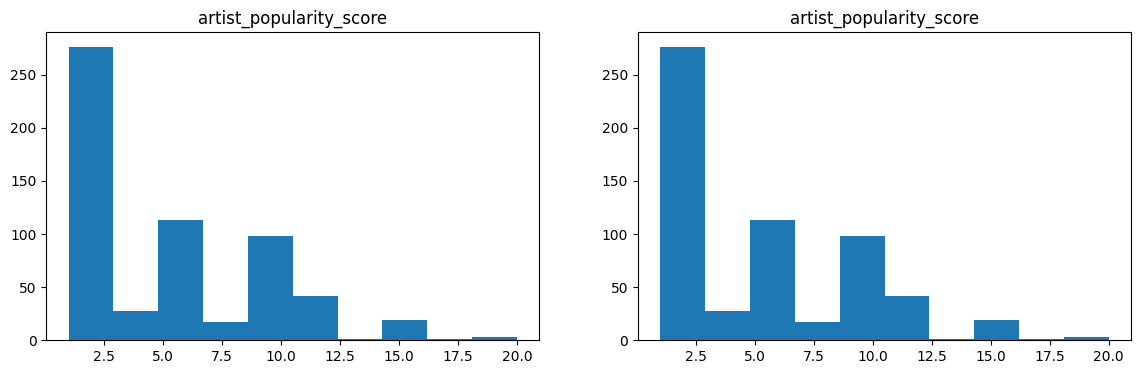

In [94]:
def binning3():
    for col in X_train.columns:
    
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        # sns.histplot(X_train[col],kde=True,stat="density")
        plt.hist(X_train[col])
        plt.title(col)
    
        plt.subplot(122)
        plt.hist(transformed_df[col])
        plt.title(col)
        print(f'{col} -->has skewness--> {skew(X_train[col])}')
        print(f'After binning {col} -->has skewness--> {skew(transformed_df[col])}')
        plt.show()
binning3()

In [86]:
import seaborn as sns

in_spotify_playlists -->has skewness--> 2.942955848987998
After binning in_spotify_playlists -->has skewness--> 0.0


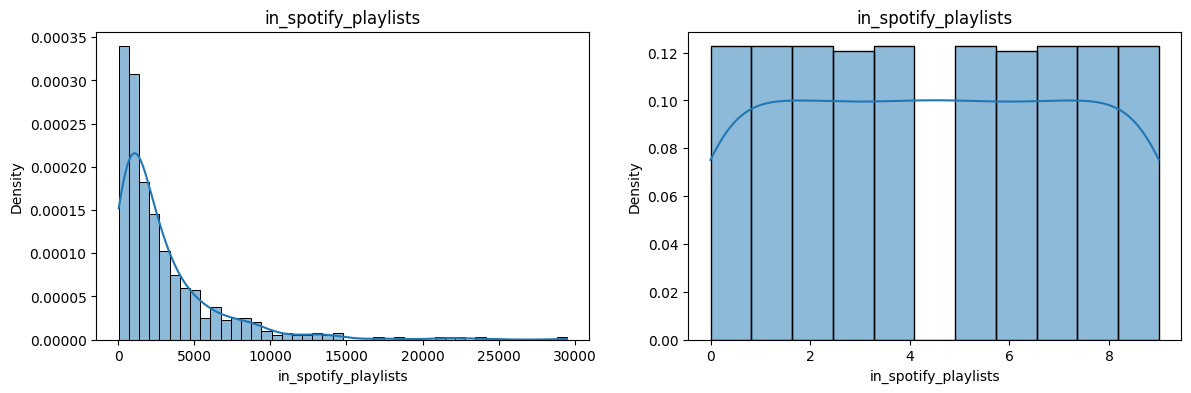

in_spotify_charts -->has skewness--> 2.6491268325801642
After binning in_spotify_charts -->has skewness--> 0.7358270254457214


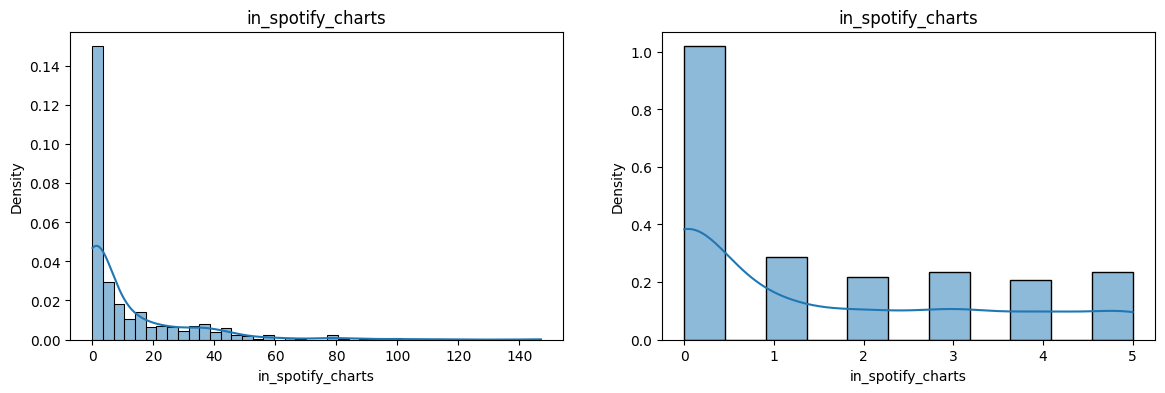

streams -->has skewness--> 2.366648567136922
After binning streams -->has skewness--> 0.0


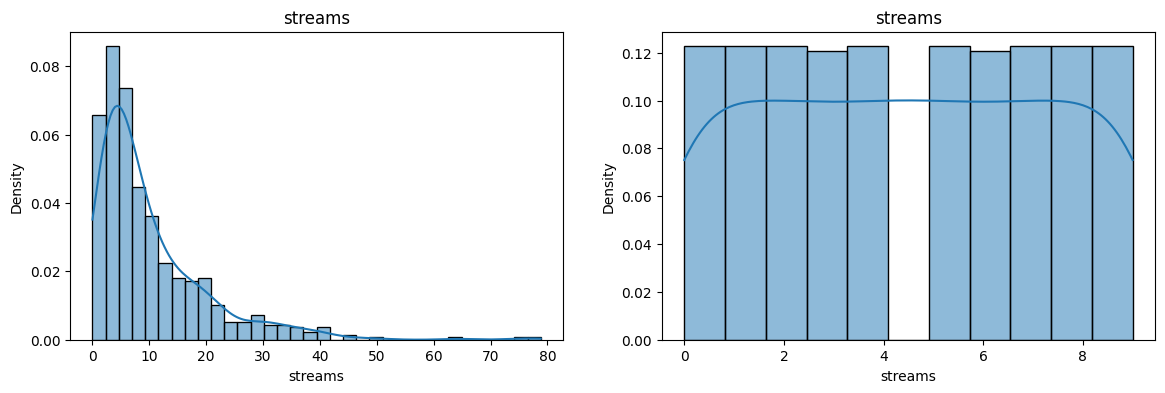

in_apple_playlists -->has skewness--> 2.478448722213829
After binning in_apple_playlists -->has skewness--> -0.0032672021860759453


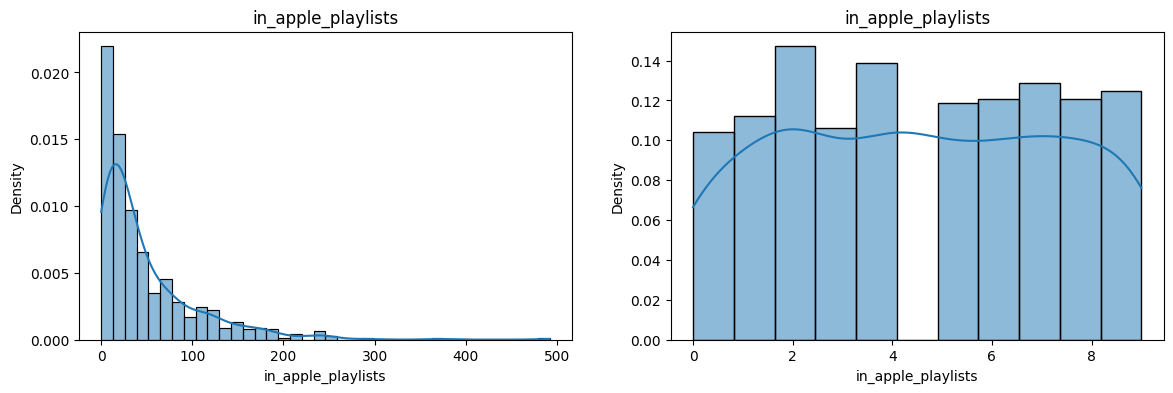

in_apple_charts -->has skewness--> 1.4006368667711946
After binning in_apple_charts -->has skewness--> 0.13223794757807356


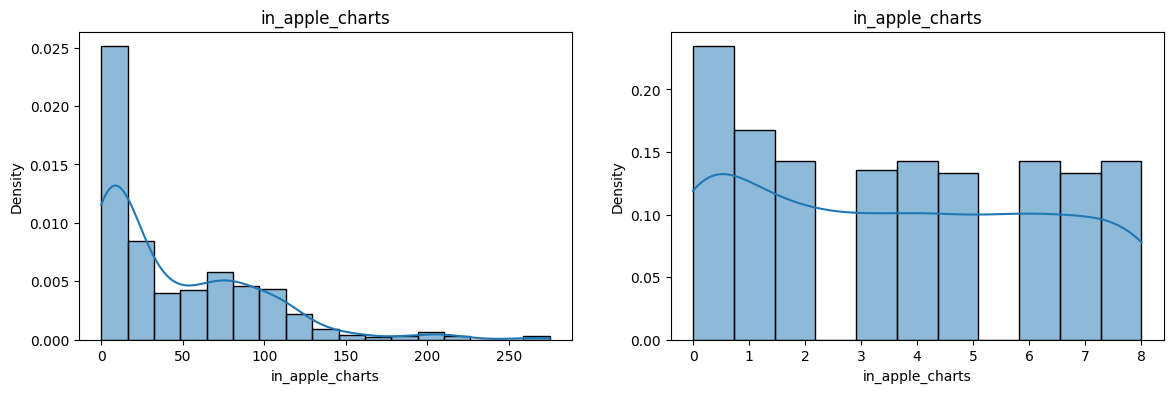

in_deezer_playlists -->has skewness--> 3.297766942141813
After binning in_deezer_playlists -->has skewness--> -0.011040224533768008


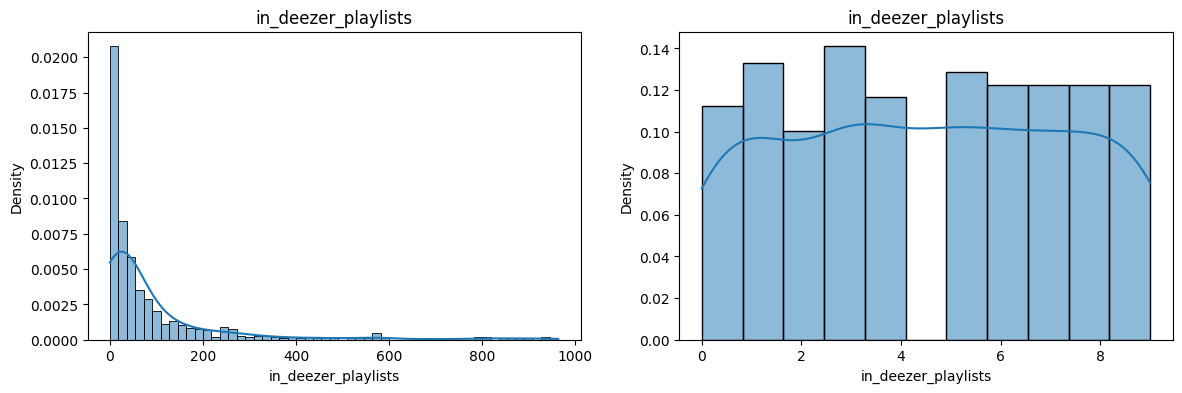

in_deezer_charts -->has skewness--> 3.241028065808733
After binning in_deezer_charts -->has skewness--> 1.1743171012110944


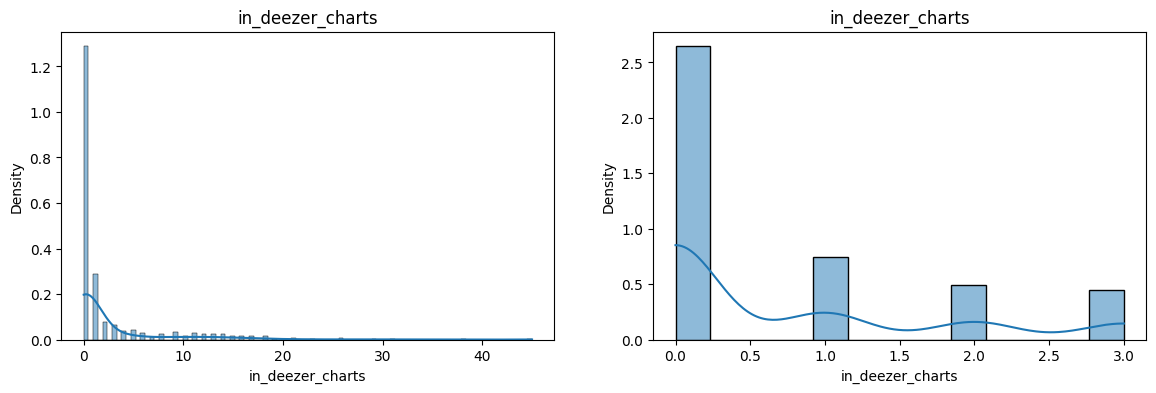

in_shazam_charts -->has skewness--> 4.184804572243403
After binning in_shazam_charts -->has skewness--> 0.49146019397257223


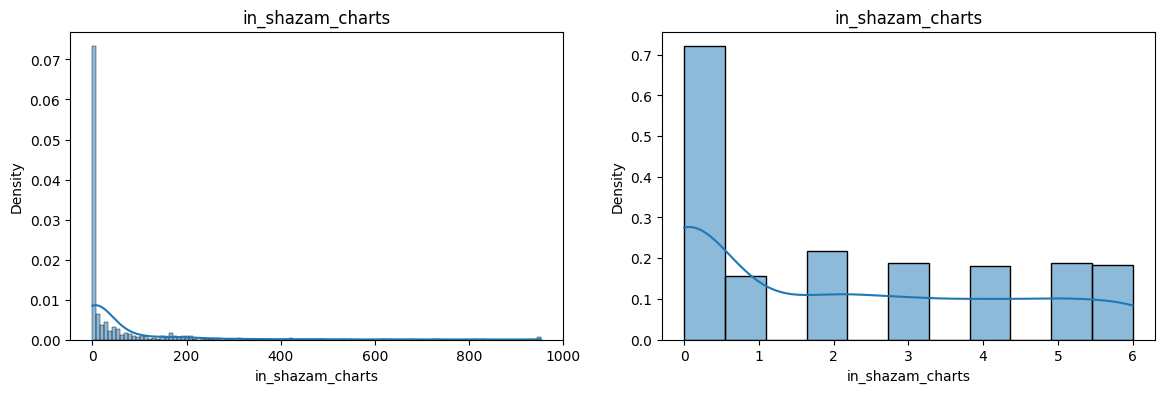

bpm -->has skewness--> 0.33311466440920523
After binning bpm -->has skewness--> -0.02162602861107462


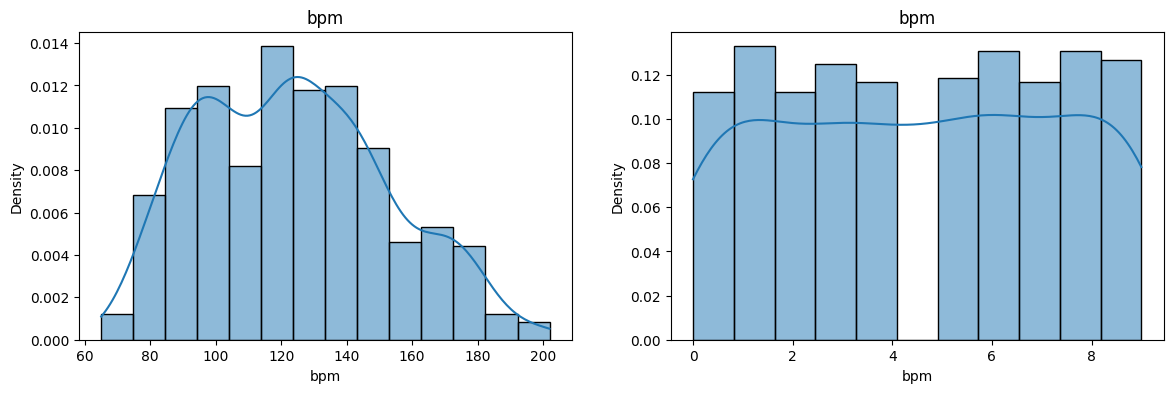

danceability_% -->has skewness--> -0.44871471111074007
After binning danceability_% -->has skewness--> -0.0009924303046223934


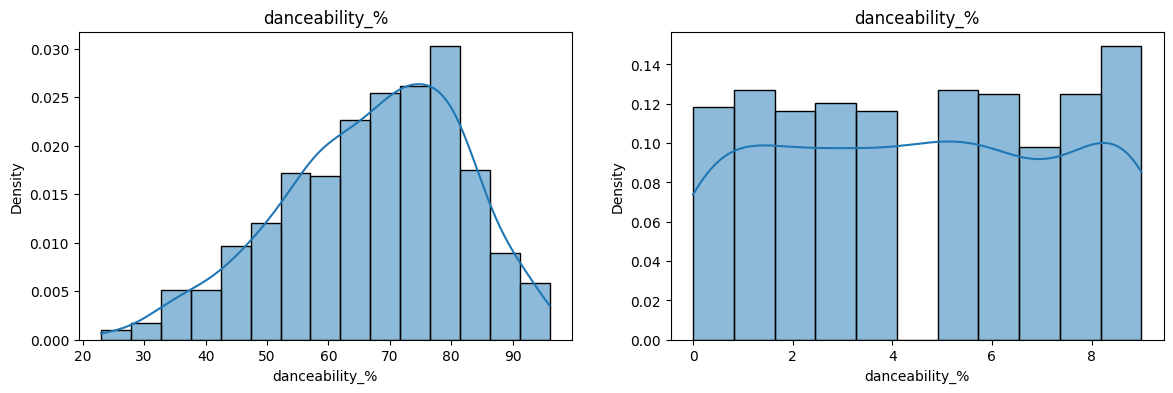

valence_% -->has skewness--> 0.028585075490389432
After binning valence_% -->has skewness--> -0.015169158873959778


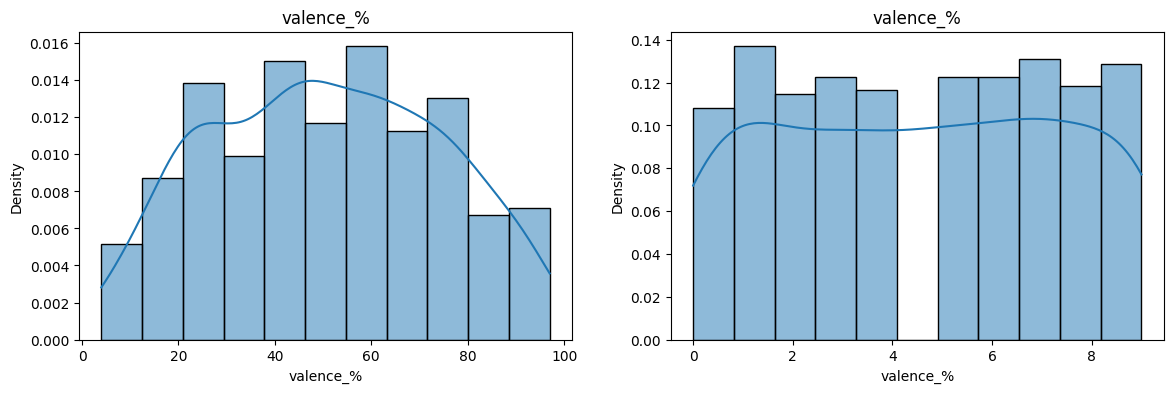

energy_% -->has skewness--> -0.3353848846501554
After binning energy_% -->has skewness--> -0.014418853377491565


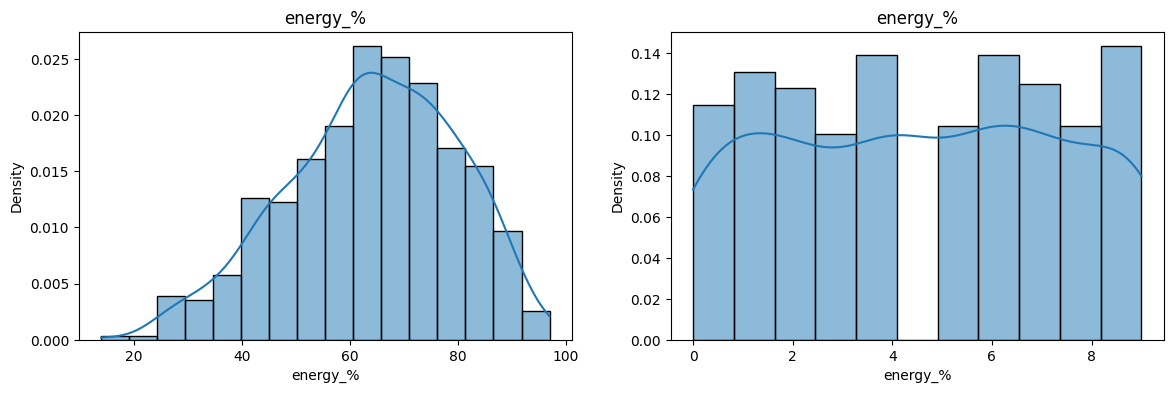

acousticness_% -->has skewness--> 0.9505708140072238
After binning acousticness_% -->has skewness--> 0.0296911560742573


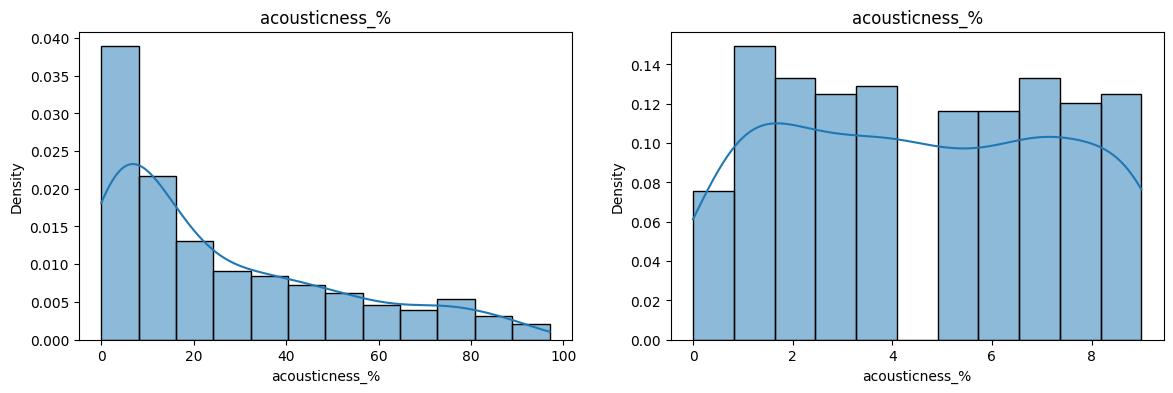

instrumentalness_% -->has skewness--> 6.28342459696652
After binning instrumentalness_% -->has skewness--> 2.6604869535924127


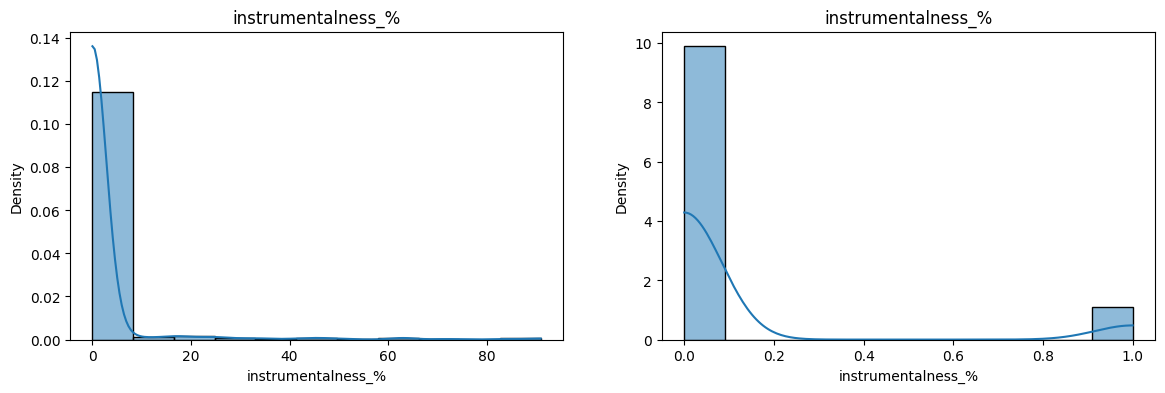

liveness_% -->has skewness--> 2.1921977277140106
After binning liveness_% -->has skewness--> -0.156591892184772


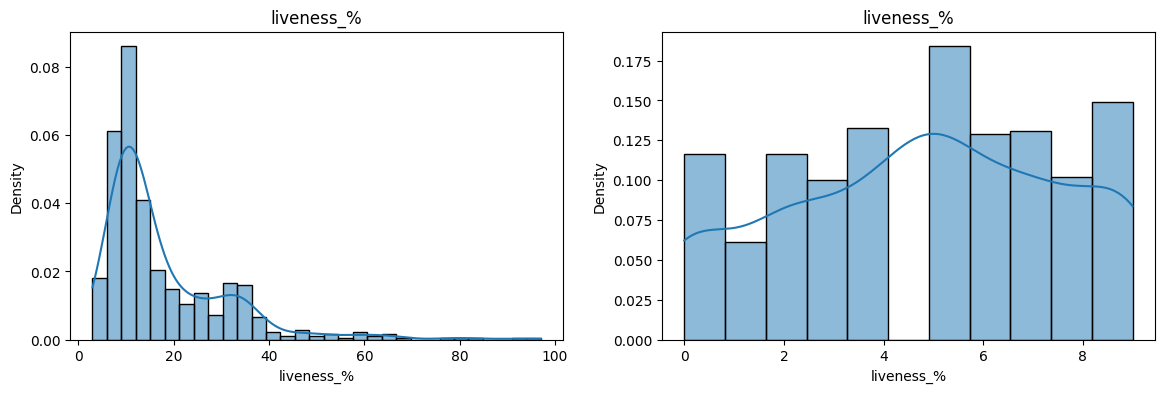

speechiness_% -->has skewness--> 1.7243828099204268
After binning speechiness_% -->has skewness--> 0.25843530775286916


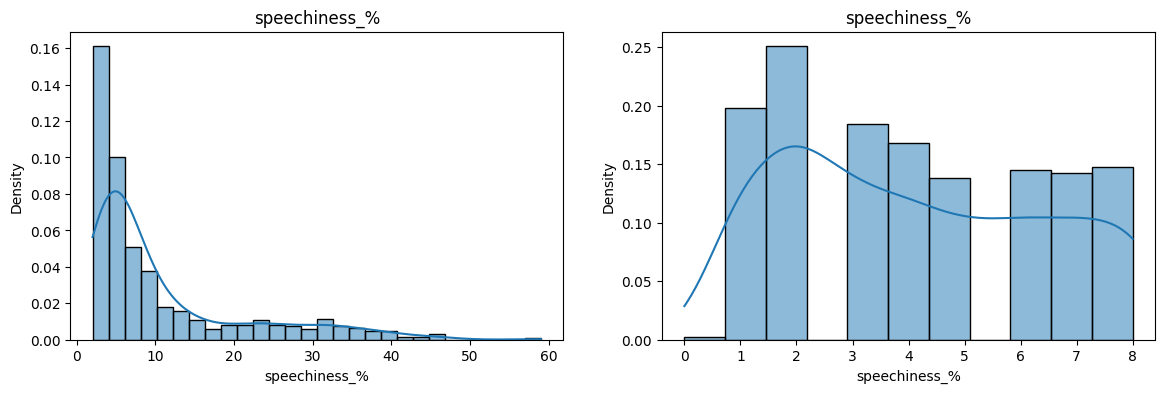

artist_popularity_score -->has skewness--> 0.82056643951907
After binning artist_popularity_score -->has skewness--> 0.82056643951907


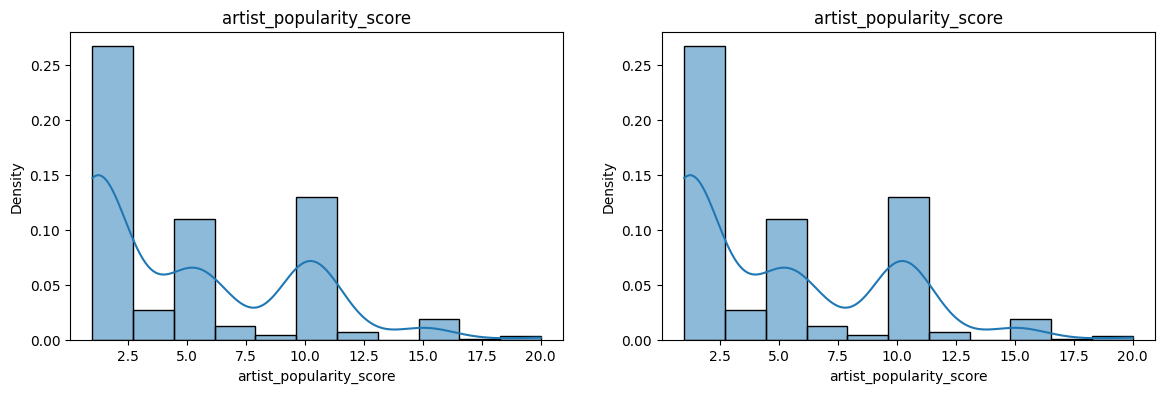

In [87]:
def binning():
    for col in X_train.columns:
        # Create a figure with 2 subplots (1 row, 2 columns)
        plt.figure(figsize=(14, 4))

        # First subplot
        plt.subplot(121)  # 1 row, 2 columns, 1st subplot
        sns.histplot(X_train[col], kde=True, stat="density")
        plt.title(col)

        # Second subplot
        plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
        sns.histplot(transformed_df[col], kde=True, stat="density")
        plt.title(col)

        # Print skewness information
        print(f'{col} -->has skewness--> {skew(X_train[col])}')
        print(f'After binning {col} -->has skewness--> {skew(transformed_df[col])}')
        
        plt.show()

binning()

In [88]:
X_train

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
597,4846,10,11.864866,54,16,259.0,0,13.0,101,67,40,90,3,0,34,6,3
303,4942,26,9.139324,190,104,147.0,18,63.0,120,70,70,79,7,0,18,10,2
327,34,0,1.914839,0,0,0.0,0,0.0,92,71,41,31,79,0,10,5,1
20,332,26,2.426492,11,163,10.0,4,0.0,140,65,87,74,22,0,42,4,11
645,580,0,7.250887,24,92,93.0,0,0.0,122,80,62,69,28,0,13,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,200,2,5.689122,12,4,0.0,0,0.0,72,64,76,44,70,9,12,4,1
768,2575,0,4.404109,4,5,12.0,0,51.0,87,52,32,83,24,0,17,43,10
648,6809,28,20.114601,151,102,175.0,5,29.0,94,84,90,70,9,0,14,8,6
695,13454,1,40.397856,246,71,519.0,2,5.0,99,68,57,77,2,0,10,5,5


in_spotify_playlists -->has skewness--> 2.942955848987998
After binning in_spotify_playlists -->has skewness--> 0.0


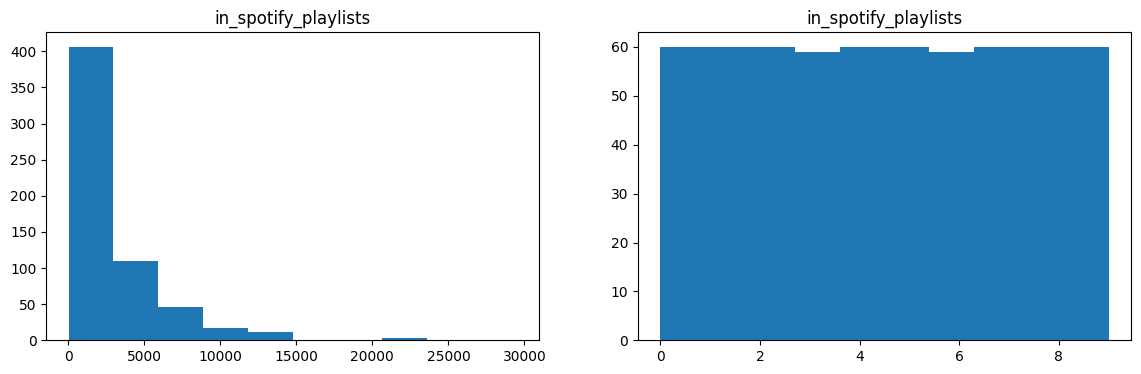

in_spotify_charts -->has skewness--> 2.6491268325801642
After binning in_spotify_charts -->has skewness--> 0.7358270254457214


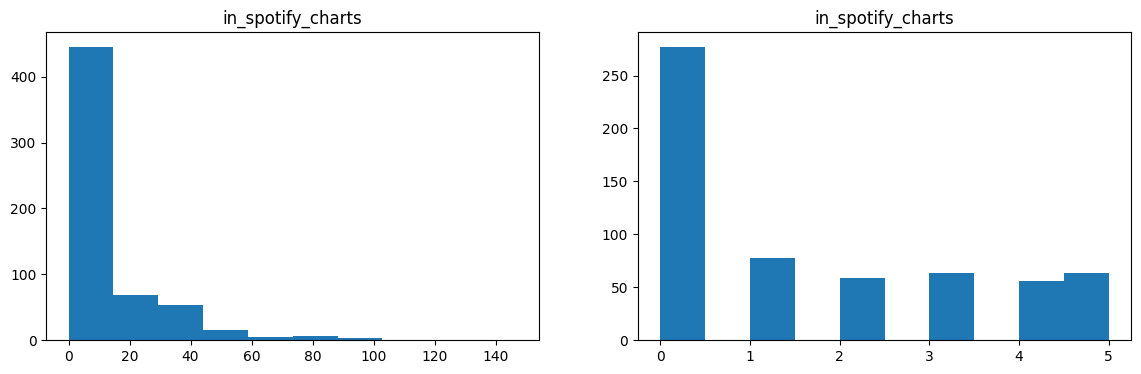

streams -->has skewness--> 2.366648567136922
After binning streams -->has skewness--> 0.0


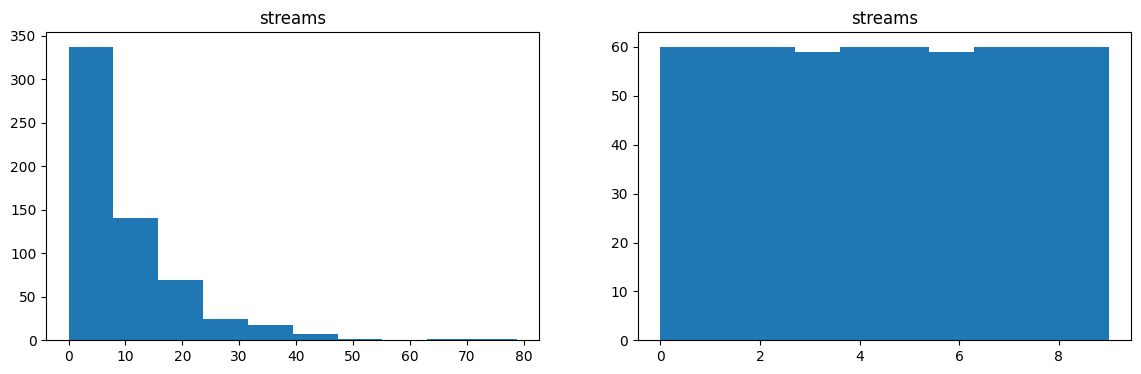

in_apple_playlists -->has skewness--> 2.478448722213829
After binning in_apple_playlists -->has skewness--> -0.0032672021860759453


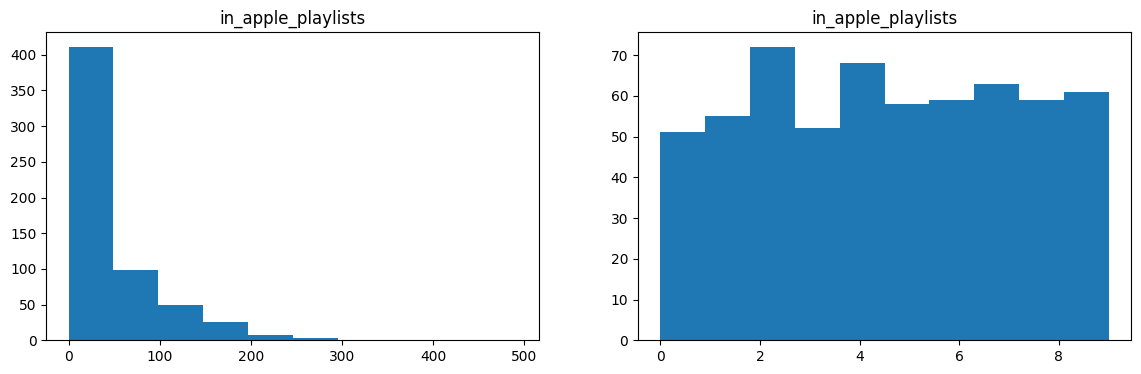

in_apple_charts -->has skewness--> 1.4006368667711946
After binning in_apple_charts -->has skewness--> 0.13223794757807356


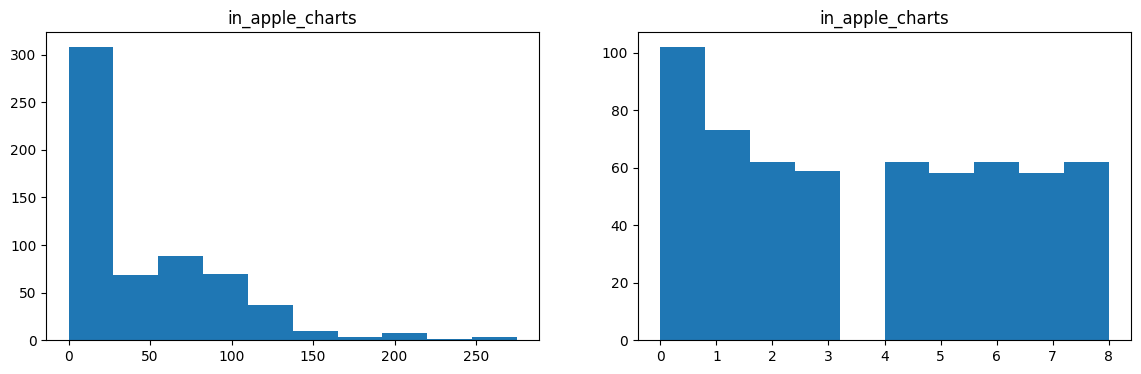

in_deezer_playlists -->has skewness--> 3.297766942141813
After binning in_deezer_playlists -->has skewness--> -0.011040224533768008


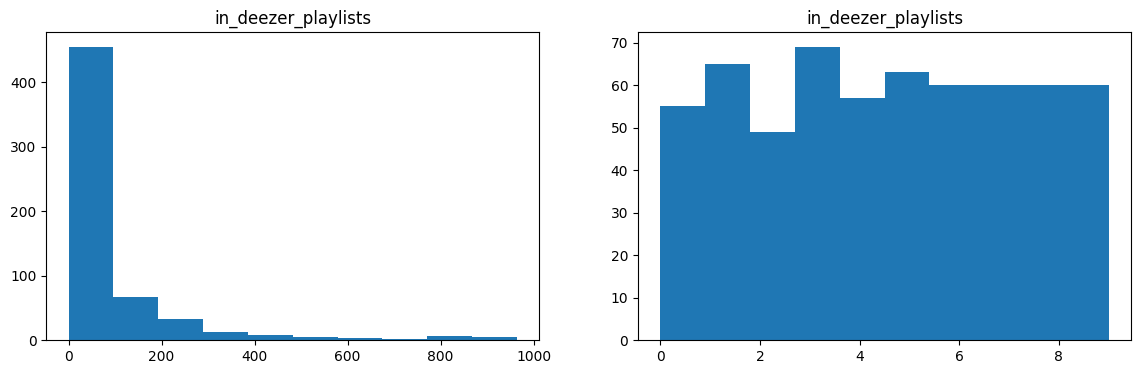

in_deezer_charts -->has skewness--> 3.241028065808733
After binning in_deezer_charts -->has skewness--> 1.1743171012110944


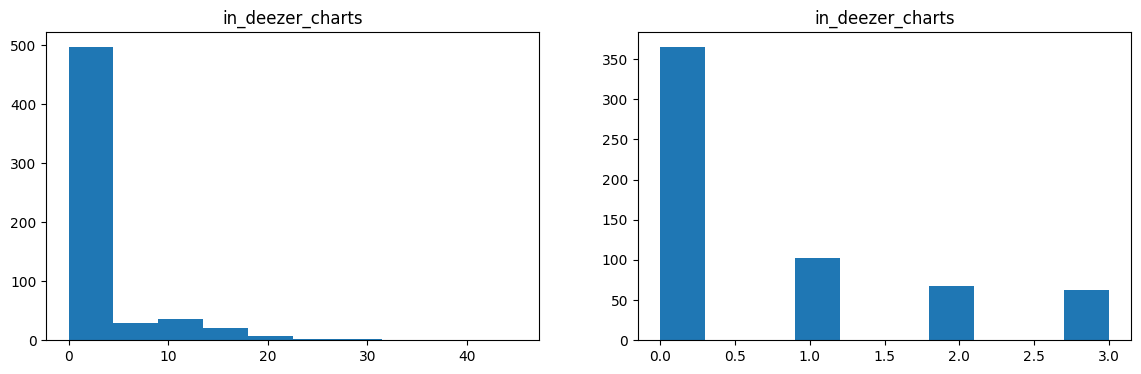

in_shazam_charts -->has skewness--> 4.184804572243403
After binning in_shazam_charts -->has skewness--> 0.49146019397257223


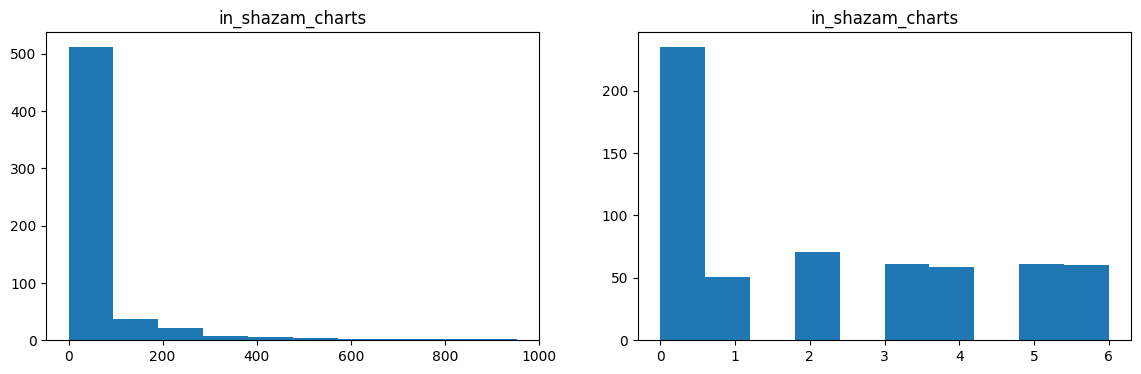

bpm -->has skewness--> 0.33311466440920523
After binning bpm -->has skewness--> -0.02162602861107462


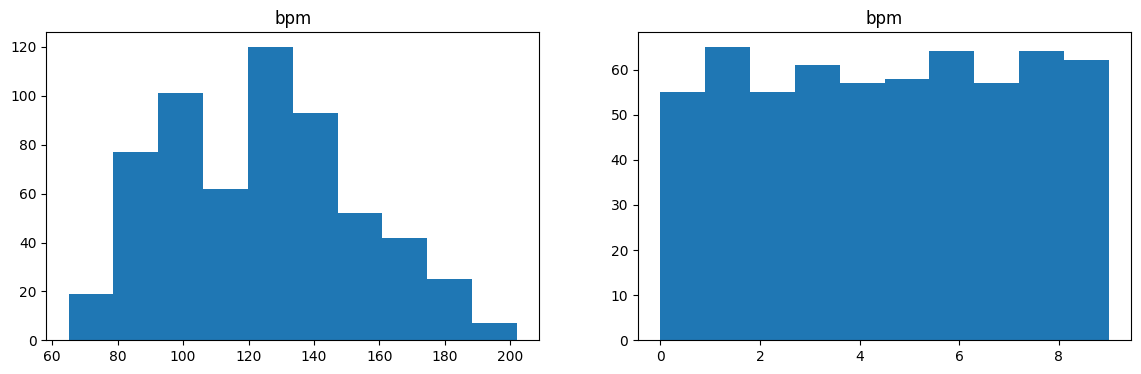

danceability_% -->has skewness--> -0.44871471111074007
After binning danceability_% -->has skewness--> -0.0009924303046223934


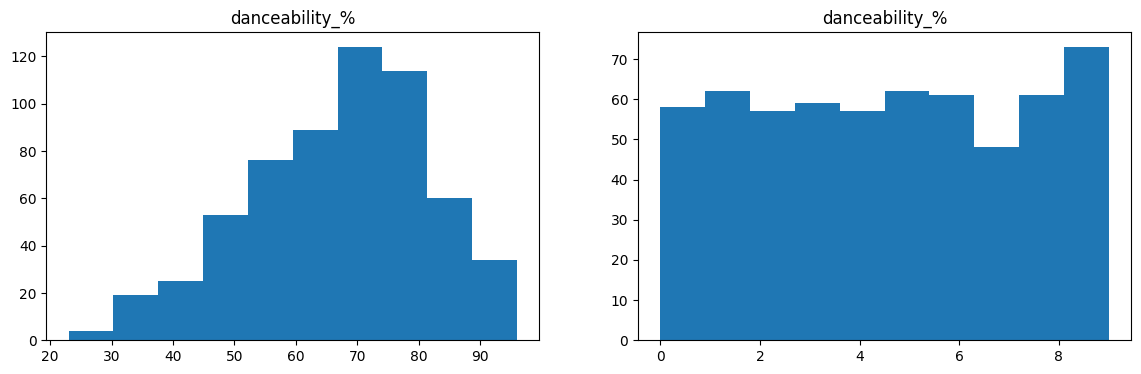

valence_% -->has skewness--> 0.028585075490389432
After binning valence_% -->has skewness--> -0.015169158873959778


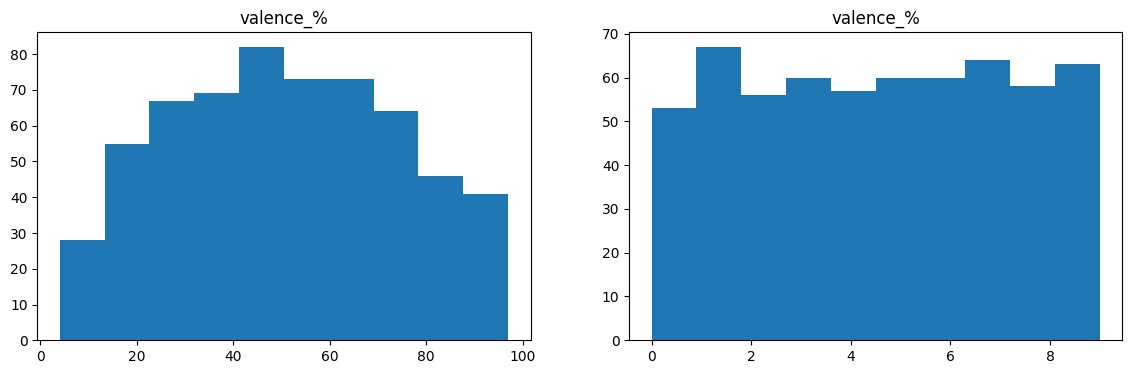

energy_% -->has skewness--> -0.3353848846501554
After binning energy_% -->has skewness--> -0.014418853377491565


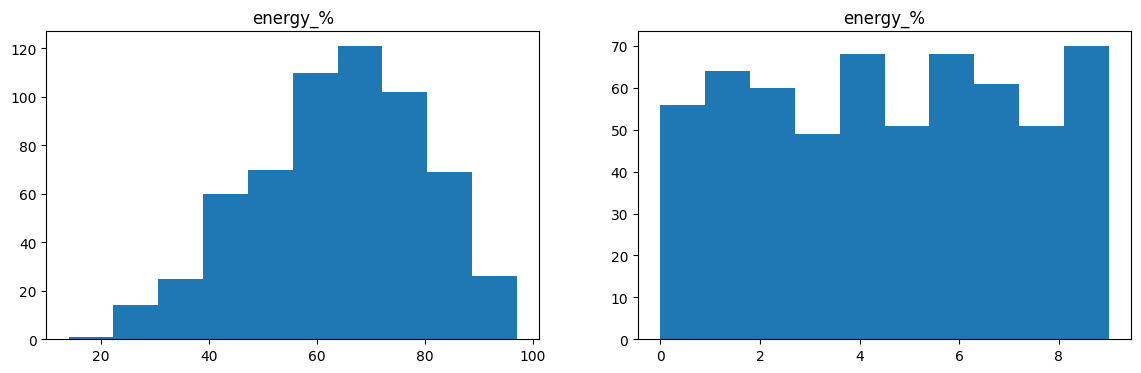

acousticness_% -->has skewness--> 0.9505708140072238
After binning acousticness_% -->has skewness--> 0.0296911560742573


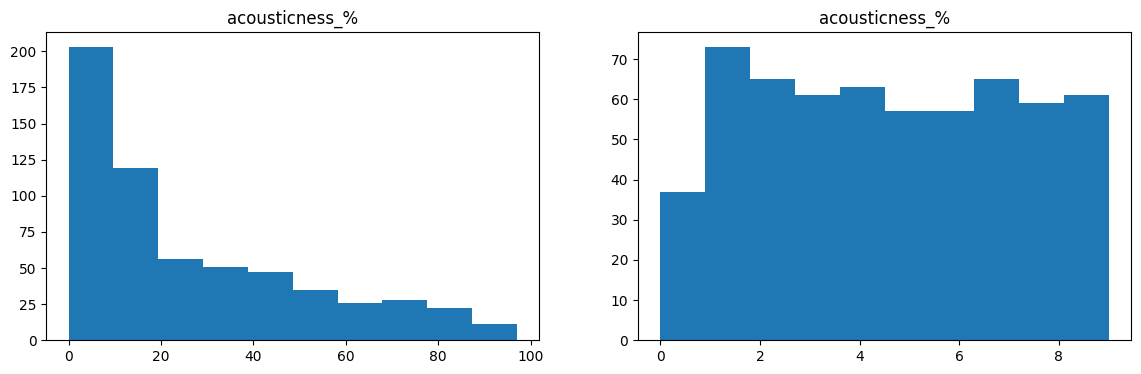

instrumentalness_% -->has skewness--> 6.28342459696652
After binning instrumentalness_% -->has skewness--> 2.6604869535924127


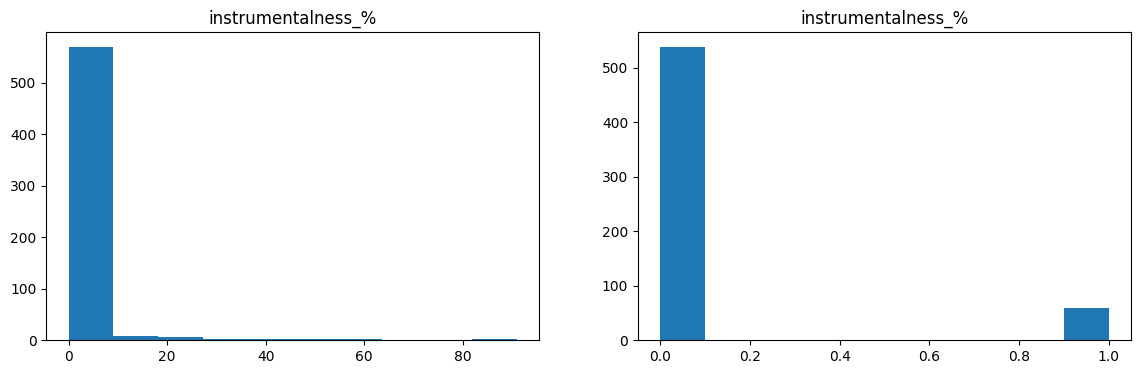

liveness_% -->has skewness--> 2.1921977277140106
After binning liveness_% -->has skewness--> -0.156591892184772


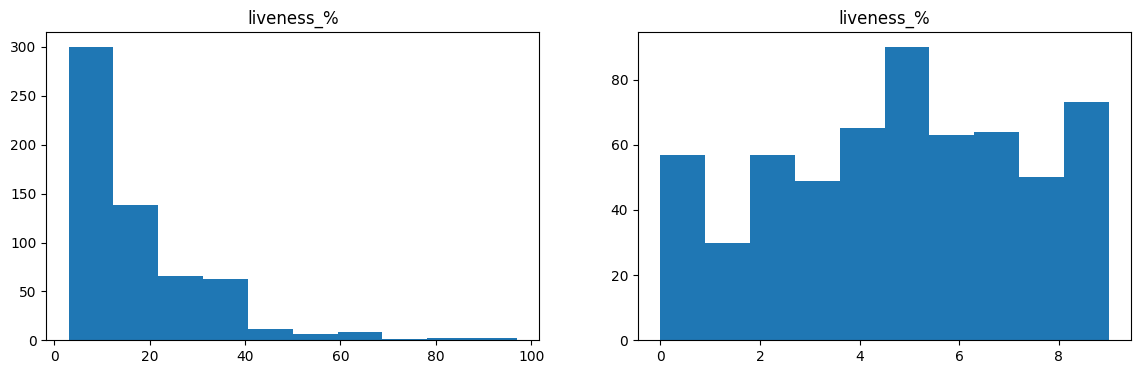

speechiness_% -->has skewness--> 1.7243828099204268
After binning speechiness_% -->has skewness--> 0.25843530775286916


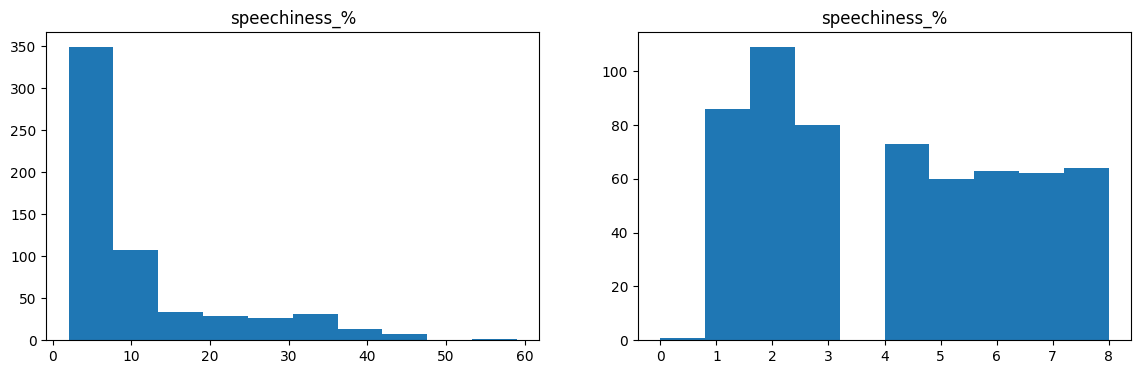

artist_popularity_score -->has skewness--> 0.82056643951907
After binning artist_popularity_score -->has skewness--> 0.82056643951907


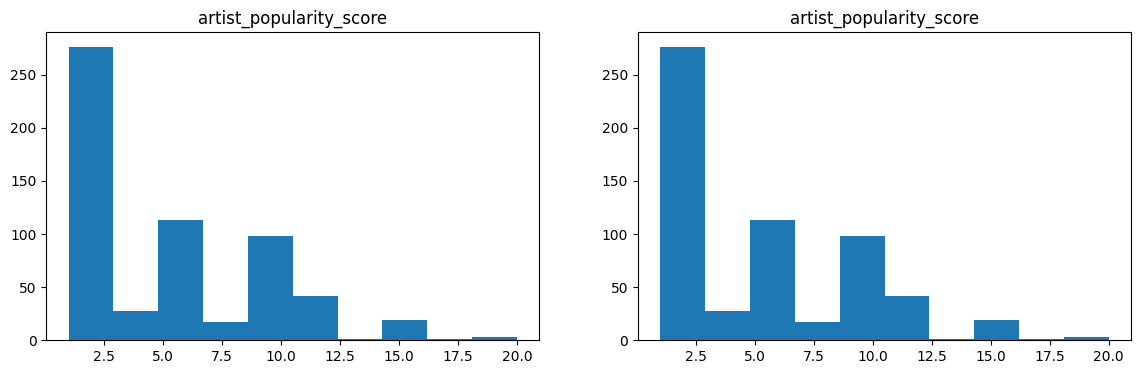

In [93]:
def binning2():
    for col in X_train.columns:
        # Create a figure with 2 subplots (1 row, 2 columns)
        plt.figure(figsize=(14, 4))

        # First subplot
        plt.subplot(121)  # 1 row, 2 columns, 1st subplot
        plt.hist(X_train[col])
        plt.title(col)

        # Second subplot
        plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
        plt.hist(transformed_df[col])
        plt.title(col)

        # Print skewness information
        print(f'{col} -->has skewness--> {skew(X_train[col])}')
        print(f'After binning {col} -->has skewness--> {skew(transformed_df[col])}')
        
        plt.show()

binning2()

In [95]:


def comparison_binning(x):

    def binning_r():
        for col in X_train.columns:
            # Create a figure with 2 subplots (1 row, 2 columns)
            plt.figure(figsize=(14, 4))
    
            # First subplot
            plt.subplot(121)  # 1 row, 2 columns, 1st subplot
            sns.histplot(X_train[col], kde=True, stat="density")
            plt.title(col)
    
            # Second subplot
            plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
            sns.histplot(transformed_df[col], kde=True, stat="density")
            plt.title(col)
    
            # Print skewness information
            print(f'{col} -->has skewness--> {skew(X_train[col])}')
            print(f'After binning {col} -->has skewness--> {skew(transformed_df[col])}')
            
            plt.show()


    
    comparison = []
    transformer3 = ColumnTransformer(transformers=[
                        ('binning',KBinsDiscretizer(n_bins=10,encode='ordinal',strategy=x),slice(0,16))
                        ],remainder='passthrough')
    X_train_trf2 = transformer3.fit_transform(X_train)
    X_test_trf2 = transformer3.transform(X_test)
    transformed_df = pd.DataFrame(X_train_trf2, columns=df2.columns)
    transformer4 = LinearRegression()
    pipe = make_pipeline(transformer3,transformer4)
    pipe.fit(X_train_trf, y_train)
    y_pred = pipe.predict(X_test_trf)
    output = np.mean(cross_val_score(transformer4,X_train_trf2,y_train,scoring='r2'))
    comparison.append(output)
    a = binning_r()
    return a, comparison
    
    

C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bin

in_spotify_playlists -->has skewness--> 2.942955848987998
After binning in_spotify_playlists -->has skewness--> 2.1479911379339303


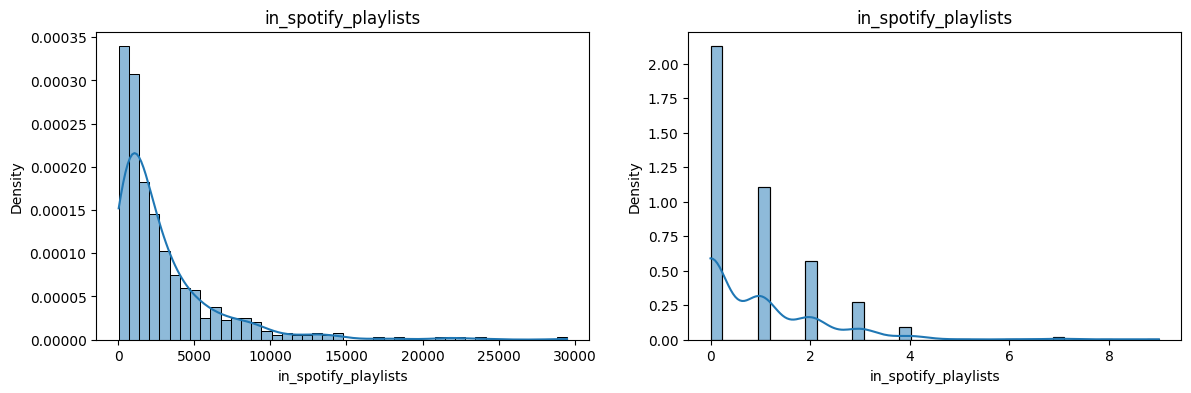

in_spotify_charts -->has skewness--> 2.6491268325801642
After binning in_spotify_charts -->has skewness--> 1.9606726039715825


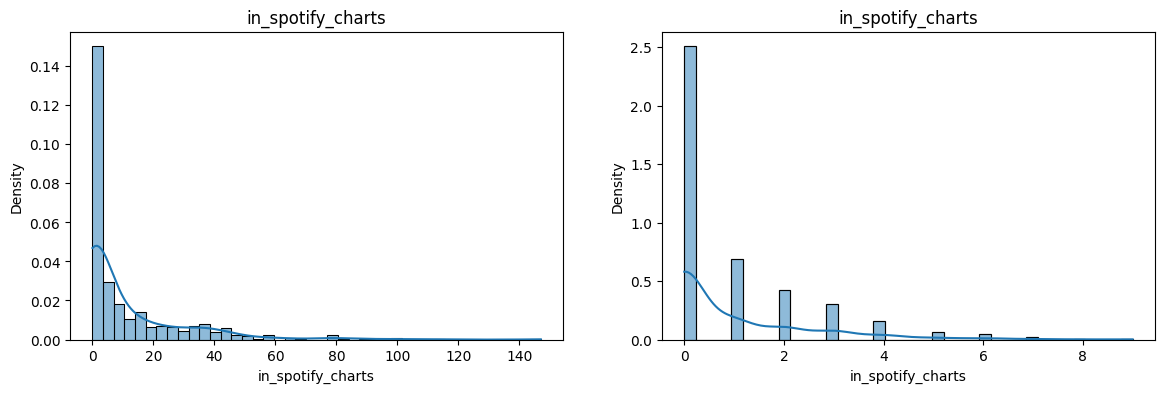

streams -->has skewness--> 2.366648567136922
After binning streams -->has skewness--> 1.378441538407919


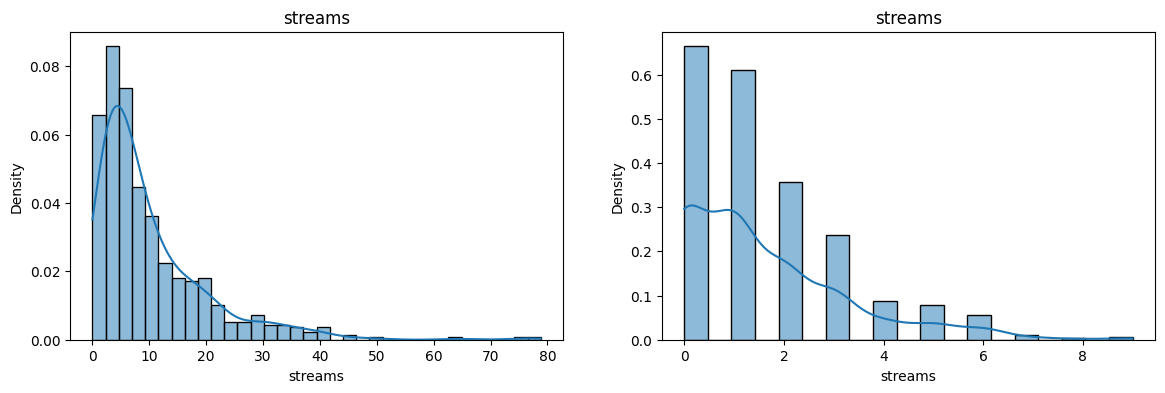

in_apple_playlists -->has skewness--> 2.478448722213829
After binning in_apple_playlists -->has skewness--> 0.9963261732280851


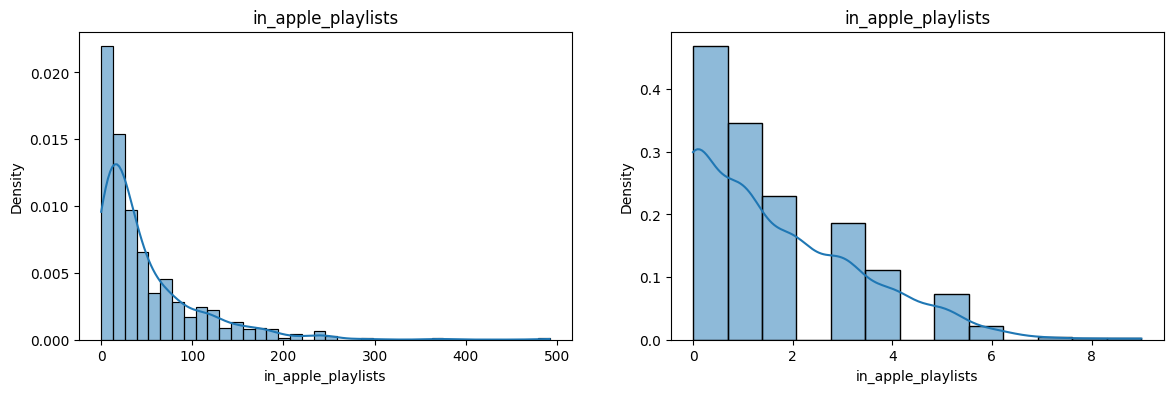

in_apple_charts -->has skewness--> 1.4006368667711946
After binning in_apple_charts -->has skewness--> 1.1220088211260117


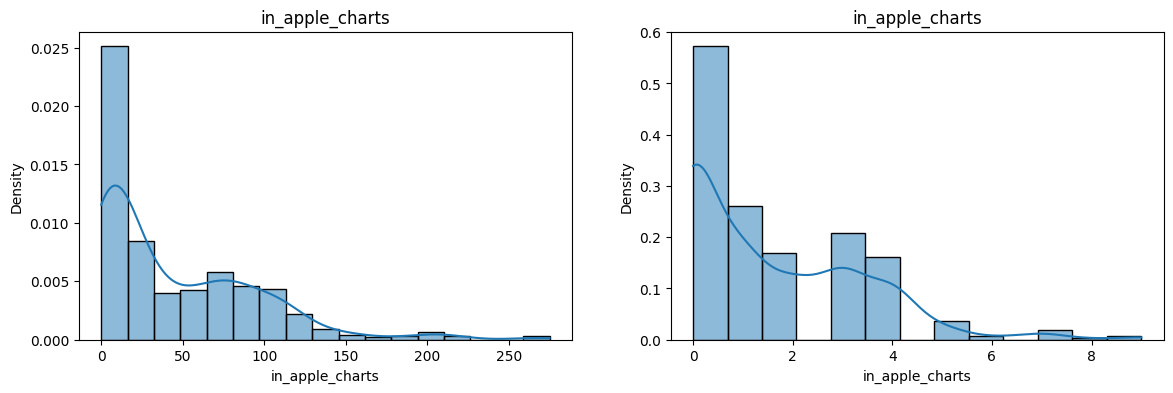

in_deezer_playlists -->has skewness--> 3.297766942141813
After binning in_deezer_playlists -->has skewness--> 2.6400860550317753


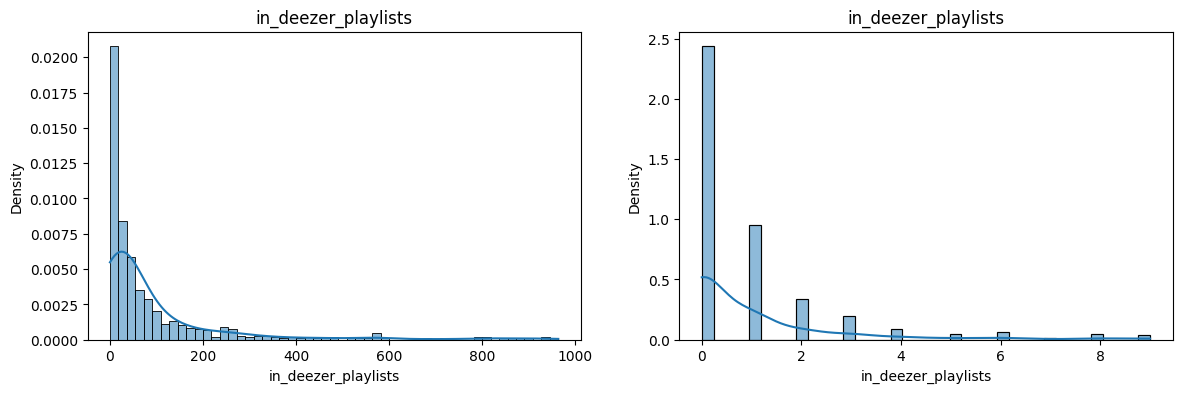

in_deezer_charts -->has skewness--> 3.241028065808733
After binning in_deezer_charts -->has skewness--> 2.248670691593754


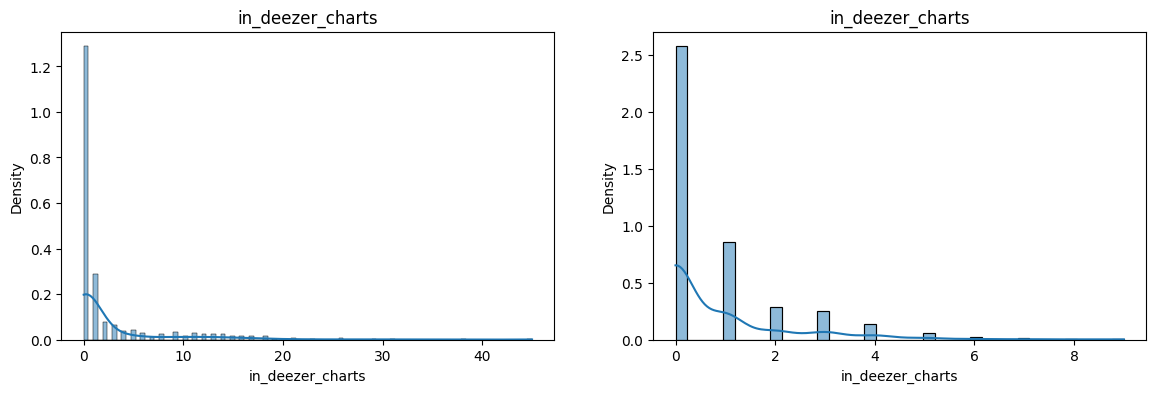

in_shazam_charts -->has skewness--> 4.184804572243403
After binning in_shazam_charts -->has skewness--> 3.799558994496099


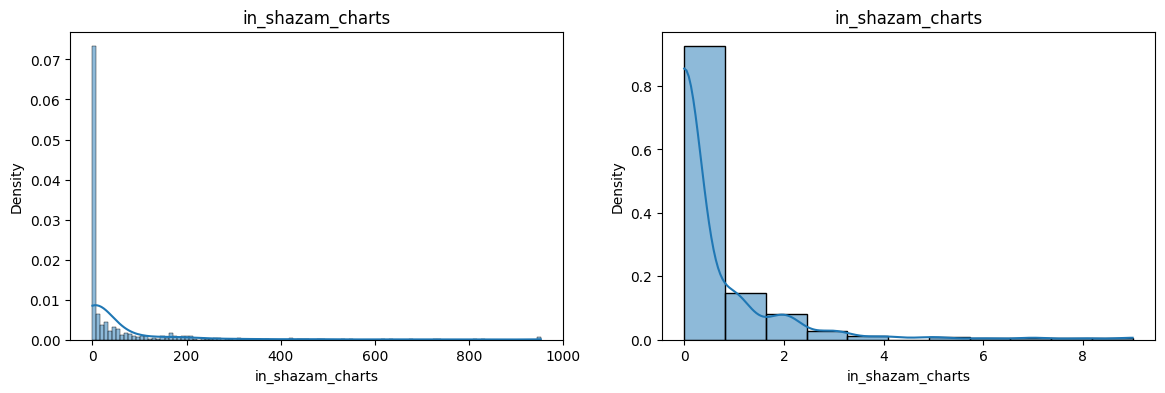

bpm -->has skewness--> 0.33311466440920523
After binning bpm -->has skewness--> 0.12400022331752185


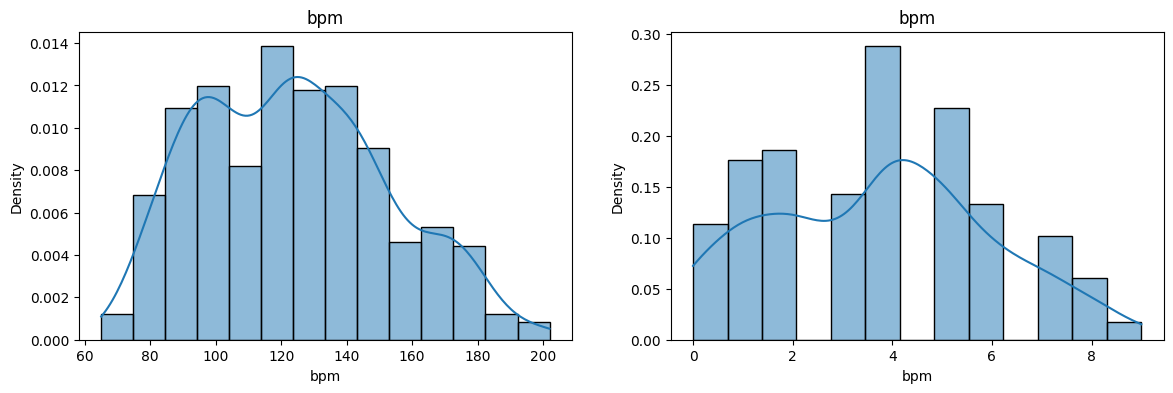

danceability_% -->has skewness--> -0.44871471111074007
After binning danceability_% -->has skewness--> -0.4194064020208867


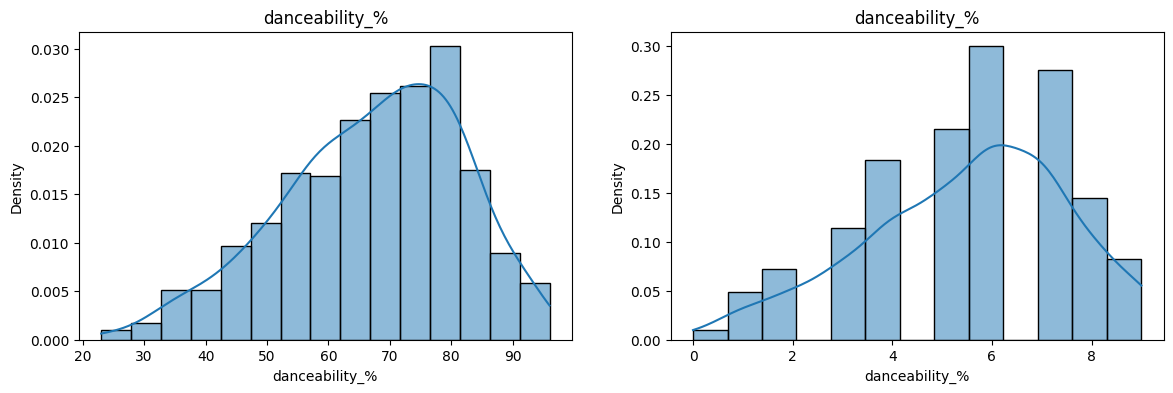

valence_% -->has skewness--> 0.028585075490389432
After binning valence_% -->has skewness--> 0.03770918404646808


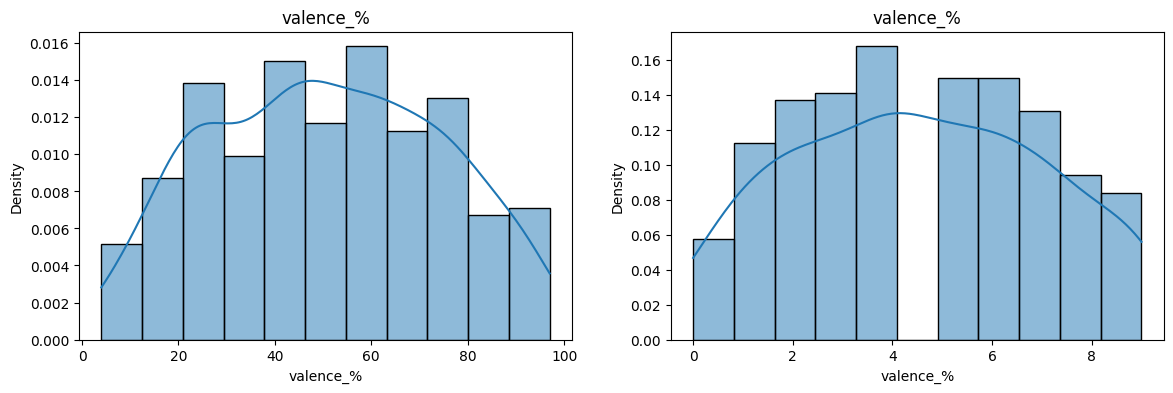

energy_% -->has skewness--> -0.3353848846501554
After binning energy_% -->has skewness--> -0.23767608248652108


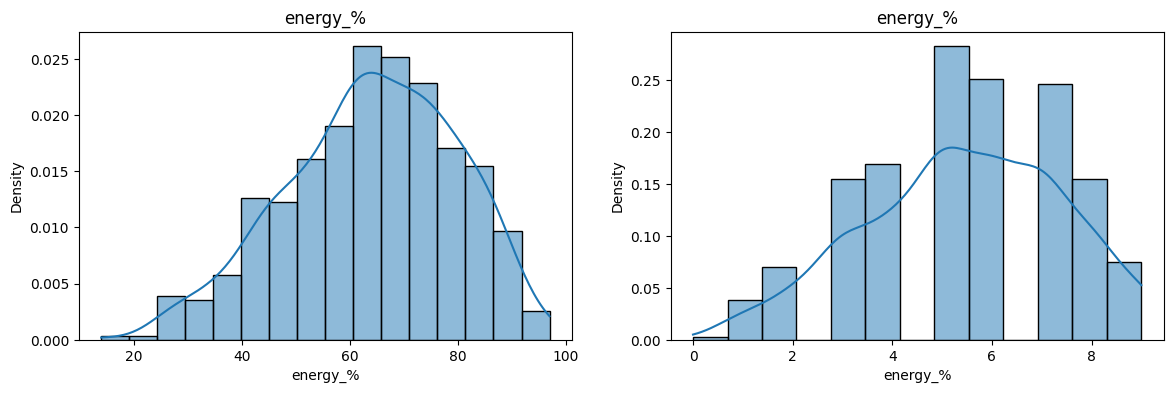

acousticness_% -->has skewness--> 0.9505708140072238
After binning acousticness_% -->has skewness--> 1.0009554362730013


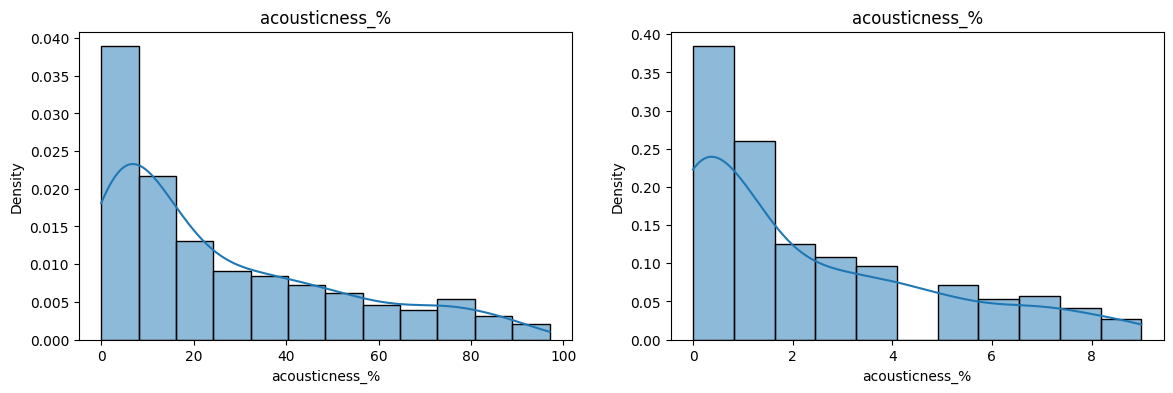

instrumentalness_% -->has skewness--> 6.28342459696652
After binning instrumentalness_% -->has skewness--> 6.664769148050145


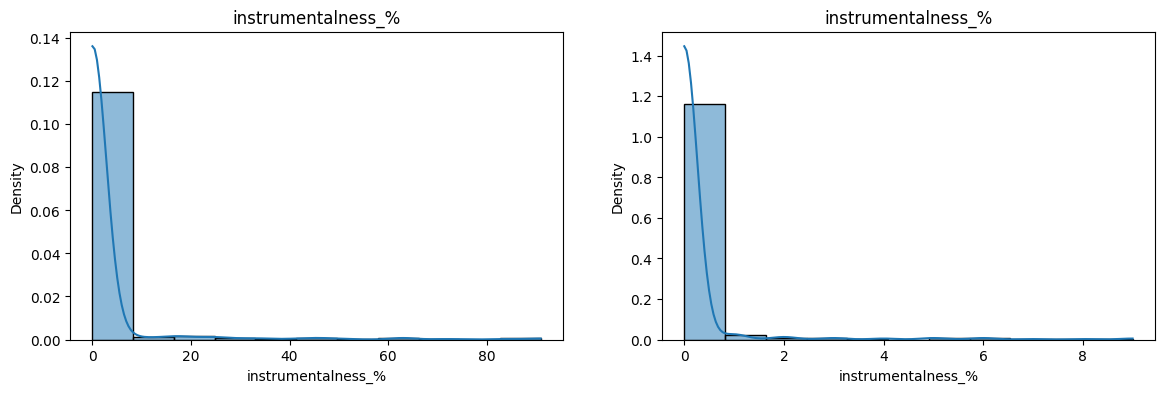

liveness_% -->has skewness--> 2.1921977277140106
After binning liveness_% -->has skewness--> 1.8412499267517006


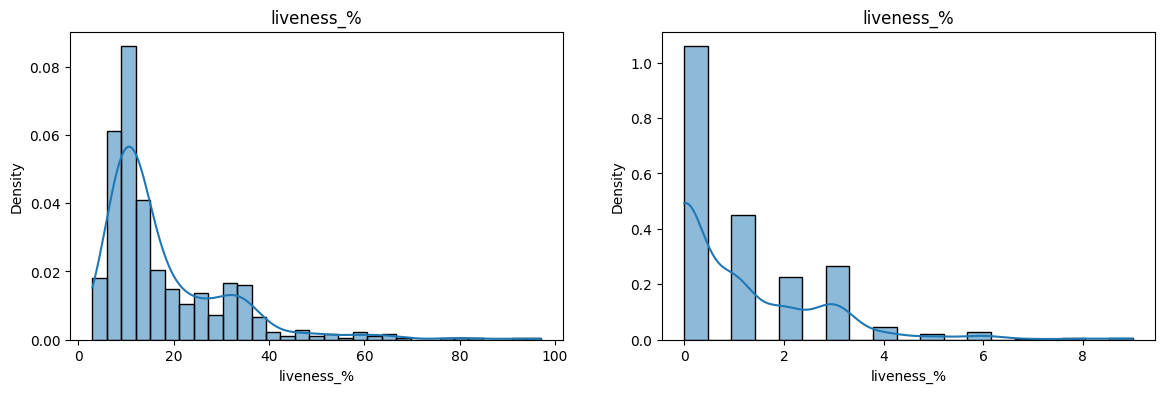

speechiness_% -->has skewness--> 1.7243828099204268
After binning speechiness_% -->has skewness--> 1.4043612058423691


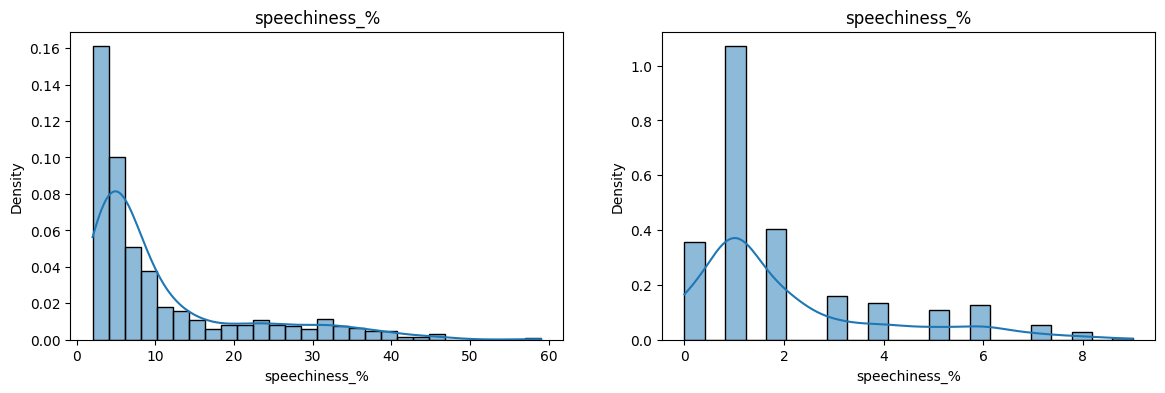

artist_popularity_score -->has skewness--> 0.82056643951907
After binning artist_popularity_score -->has skewness--> 0.82056643951907


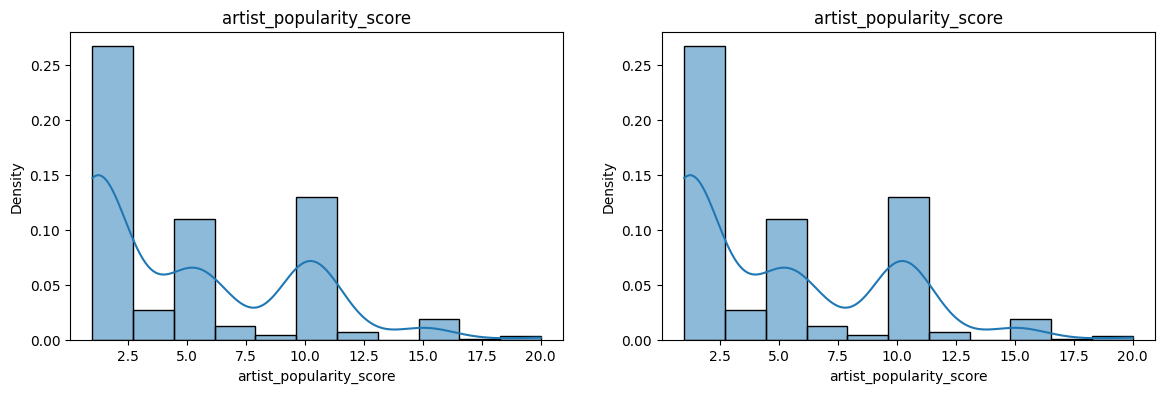

(None, [0.9431427023149052])

In [100]:
comparison_binning('kmeans')

In [91]:
#(None, [0.9517205429025021])